<a href="https://colab.research.google.com/github/Datamin-D/movie_predict/blob/master/Movie_predict_preprocessing_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preprocessing

##1.데이터 합치기 

26개 다운로드 후, **나 '추후에' 검색해서 바꾸기.

In [1]:
import pandas as pd
import numpy as np
import re
import pickle
import ast
!pip install git+https://github.com/alberanid/imdbpy #imdbpy 설치
from imdb import IMDb
import time
import requests
from bs4 import BeautifulSoup

  Cloning https://github.com/alberanid/imdbpy to /tmp/pip-req-build-e3e4414d
  Running command git clone -q https://github.com/alberanid/imdbpy /tmp/pip-req-build-e3e4414d
  Created wheel for IMDbPY: filename=IMDbPY-2020.11.18-cp36-none-any.whl size=314791 sha256=012c65eab6a37598bde32bd76ca8a84840e2874870575a5fd04e19fb5d1fd674
  Stored in directory: /tmp/pip-ephem-wheel-cache-mmmbe1af/wheels/0f/09/61/190df5e0276765680540f1562f2abca80e725a7e48595e993f
Successfully built IMDbPY


In [3]:
#구글드라이브 마운트
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [4]:
#Genre NaN수정한 df
df = pd.read_csv("/gdrive/My Drive/movie_predict/raw_df1.csv")
df

,Movie_title,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor,Unnamed: 17,Unnamed: 18,Movie_code,imdb_url
0,Hidalgo (2004),287,"['Action', 'Adventure', 'Biography']",['6.7'],"76,241",['2h 16min'],"$100,000,000 (estimated)","$67,303,450","$18,829,435, 7 March 2004","$108,040,622","['English ', ' Arabic ', ' Sioux']",['Joe Johnston'],['John Fusco'],"['Viggo Mortensen', 'Zuleikha Robinson', 'Omar...",['PG-13'],5 March 2004,Walt Disney Studios,NaN,NaN,NaN,NaN
1,Ned Kelly (2003),317,"['Action', 'Adventure', 'Biography']",['6.5'],"25,412",['1h 50min'],NaN,"$86,959","$43,704, 28 March 2004","$6,585,516",['English'],['Gregor Jordan'],"['Robert Drewe', 'John Michael McDonagh']","['Heath Ledger ...', 'Orlando Bloom', 'Geoffre...",['R'],26 March 2004,Focus Features,NaN,NaN,NaN,NaN
2,Milarepa (2006),351,"['Action', 'Adventure', 'Biography']",['7.0'],923,['1h 30min'],"$1,800,000 (estimated)","$151,114","$8,330, 9 September 2007","$252,154",['Tibetan'],['Neten Chokling'],"['Neten Chokling', 'Tenzing Choyang Gyari']","['Orgyen Tobgyal', 'Orgyen Tobgyal ... Yongten...",['PG'],7 September 2007,Luminous Velocity Releasing,NaN,NaN,NaN,NaN
3,Der Rote Baron (2008),304,"['Action', 'Adventure', 'Biography']",['6.4'],"11,545",['1h 46min'],"EUR18,000,000 (estimated)","$37,189","$13,931, 21 March 2010","$2,783,332","['German ', ' English ', ' French']",['Nikolai M'],['Nikolai Müllerschön'],['Tomás Koutník ... Young Manfred von Richthof...,['PG-13'],19 March 2010,NaN,NaN,NaN,NaN,NaN
4,Zhi qu wei hu shan (2014),31,"['Action', 'Adventure', 'Biography']",['6.4'],"2,688",['2h 21min'],NaN,"$228,984","$50,621, 4 January 2015","$141,654,055","['Mandarin ', ' English']",['Hark Tsui'],"['Bo Qu', 'Jianxin Huang', 'Hark Tsui', 'Yang ...","['Hanyu Zhang', 'Tony Ka Fai Leung ...', 'Kenn...",['Not Rated'],2 January 2015,Well Go USA Entertainment,NaN,NaN,tt3950078,https://www.imdb.com/title/tt3950078/?ref_=fn_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12457,Bolshoi Ballet: Le Corsaire (2019),121,[],['NA'],NaN,[''],NaN,"$190,192","$190,192, 17 November 2019","$305,653",['Korean'],[],[],[],[],NaN,Fathom Events,NaN,NaN,tt11309084,https://www.imdb.com/title/tt11309084/?ref_=fn...
12458,Darshan (1941),138,[],['7.0'],8,[''],NaN,"$66,032","$3,360, 30 July 2006","$240,819",['Hindi'],['Chimanlal Luhar'],['Mohanlal G. Dave'],"['Prem Adib', 'Jyoti ... (as Miss Jyoti)', 'Bh...",[],18 August 2006,IFC Films,NaN,NaN,NaN,NaN
12459,Il trittico dell'amore (1920),281,[],['NA'],NaN,[''],NaN,"$80,374","$2,235, 4 May 2008","$80,374",['Italian'],['Ugo Falena'],[],"['Mimi Aylmer', 'Lorenzo Benini', 'Rina Calabr...",[],2 November 2007,Emerging Pictures,NaN,NaN,NaN,NaN
12460,The Bolshoi Ballet: Live From Moscow - A Hero ...,289,[],['NA'],NaN,['2h 45min'],NaN,"$104,837","$104,837, 9 April 2017","$135,168",['English'],[],[],[],[],7 April 2017,Fathom Events,NaN,NaN,tt8884102,https://www.imdb.com/title/tt8884102/?ref_=fn_...


In [5]:
"""
#새 경로에서 불러오기

#1. 구글 드라이브에서 Movie_data 다운로드, 합치기 
df = pd.DataFrame()
df_list = []
[df_list.append("df"+str(df_no)) for df_no in range(26)]
print('df_list:',df_list)
df = pd.DataFrame(data = None) #첫번째 df. 빔. 빈 df 만들기: pd.DataFrame(data = None)

for data_ind, df_element in zip(range(0,26),df_list): #**추후에 바꿔 range(26)으로 #ZIP 함수를 활용해서 for i,j in zip(--,--): 이렇게 변수 두개 쓸 수도 있음. 
  #박사님's path = "/gdrive/My Drive/movie/"+"movie_data_"+str(data_ind)+".csv"
  path = "/gdrive/My Drive/movie_predict/영화중복실험/movie_data_"+str(data_ind)+".csv"
  print("path:",path)
  print(df_element)


  df_element = pd.read_csv(path, index_col = "Movie_title") #pd.read_csv('폴더경로',index_col = "column이름") 
  print(df_element)
  df = pd.concat([df, df_element]) #df0,df1,df2,...


#df.describe()
df
  #이렇게 하면 df_list의 값에 바로 pd가 지정되는게 아니라 ex) 'df_list[data_ind]'가 pd로 지정됨. 각각 list안에값을 변수 이름으로 하고프면

"""

'\n#새 경로에서 불러오기\n\n#1. 구글 드라이브에서 Movie_data 다운로드, 합치기 \ndf = pd.DataFrame()\ndf_list = []\n[df_list.append("df"+str(df_no)) for df_no in range(26)]\nprint(\'df_list:\',df_list)\ndf = pd.DataFrame(data = None) #첫번째 df. 빔. 빈 df 만들기: pd.DataFrame(data = None)\n\nfor data_ind, df_element in zip(range(0,26),df_list): #**추후에 바꿔 range(26)으로 #ZIP 함수를 활용해서 for i,j in zip(--,--): 이렇게 변수 두개 쓸 수도 있음. \n  #박사님\'s path = "/gdrive/My Drive/movie/"+"movie_data_"+str(data_ind)+".csv"\n  path = "/gdrive/My Drive/movie_predict/영화중복실험/movie_data_"+str(data_ind)+".csv"\n  print("path:",path)\n  print(df_element)\n\n\n  df_element = pd.read_csv(path, index_col = "Movie_title") #pd.read_csv(\'폴더경로\',index_col = "column이름") \n  print(df_element)\n  df = pd.concat([df, df_element]) #df0,df1,df2,...\n\n\n#df.describe()\ndf\n  #이렇게 하면 df_list의 값에 바로 pd가 지정되는게 아니라 ex) \'df_list[data_ind]\'가 pd로 지정됨. 각각 list안에값을 변수 이름으로 하고프면\n\n'

In [6]:
"""
#원본 df 저장

#코랩에서 pickle문법은
# with open('코랩경로\저장할이름','wb') as f:
#   pickle.dump(저장할 객체,'f')

import pickle
with open ('/gdrive/My Drive/movie_predict/raw_df.csv','wb') as f:
  pickle.dump(df,f)

  
#영화제목 저장
Movie_titles = df.index.to_list


with open("/gdrive/My Drive/movie_predict/Movie_titles","wb") as fw:
    pickle.dump(Movie_titles, fw)
    

#영화 제목 불러오기 테스트

with open("/gdrive/My Drive/movie_predict/Movie_titles","rb") as fr:
    data = pickle.load(fr)

print(data)
"""

'\n#원본 df 저장\n\n#코랩에서 pickle문법은\n# with open(\'코랩경로\\저장할이름\',\'wb\') as f:\n#   pickle.dump(저장할 객체,\'f\')\n\nimport pickle\nwith open (\'/gdrive/My Drive/movie_predict/raw_df.csv\',\'wb\') as f:\n  pickle.dump(df,f)\n\n  \n#영화제목 저장\nMovie_titles = df.index.to_list\n\n\nwith open("/gdrive/My Drive/movie_predict/Movie_titles","wb") as fw:\n    pickle.dump(Movie_titles, fw)\n    \n\n#영화 제목 불러오기 테스트\n\nwith open("/gdrive/My Drive/movie_predict/Movie_titles","rb") as fr:\n    data = pickle.load(fr)\n\nprint(data)\n'

### 2000년도 이전에 수집된 영화 없애기

In [7]:
#뒤에 ()가 2000-2019가 아닌놈들 정규표현식으로 걸러내기. 몇개인지 파악, ㄱㅊ하면 육안으로 확인, 없애기.

#()정규표현식 
years = [str(i) for i in range(2000,2020)]
print(years)

#재개봉한 데이터들은 두세개씩 들어가 있을 수 있음. index가 2,3ㄱ새 같은거있으면 찾아내자.
#1999영환데 재개봉/worldwide개봉 됨: 'Magnolia (1999)','Girl, Interrupted (1999)',"Angela's Ashes (1999)",Play It to the Bone (1999)

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']


In [9]:
#정규표현식을 활용해 제목 (연도) 의 연도로 가져오는 방법 -->비추.. Released date이 좀 더 명확한 미국기준. --> 그래도 제목기준으로 지워야할 놈들 존재. Released_date, 지우기 완료.

i = 0
uninvited = []
att_err = []
err  = []
for i in range(df.shape[0]):
  try:
    p = re.search(r'(.*) \(([0-9]{4})\)', df['Movie_title'].iloc[i])
    if p.group(2) not in years:
      uninvited.append(p.group())
      #print(p.group())
  except AttributeError:
    att_err.append(df['Movie_title'].iloc[i])
    print("att_err:",df['Movie_title'].iloc[i])
  except:
    err.append(df['Movie_title'].iloc[i])

print("2000년도 이전 영화:",len(uninvited)) #568개 

# end of affair 부터 1999, 2000년도에 걸친 애들 uninvited리스트에서 지우기  ==> 폐기
#invited = [] #end of affair 부터 2000s년 걸친애들 ***
#for uninvited_movie in uninvited:
#  if uninvited_movie in invited:
#    uninvited.remove(uninvited_movie)
#  else:
#    pass
df = df[df['Movie_title'].map(lambda x: x not in uninvited)]

att_err: Hysteria
2000년도 이전 영화: 0


In [10]:
#위에보다 매우 심플한 방법..만은 아니고 그냥 다른 경우임. 이 경우는 released_date은 2000 이전인데 제목에는 2000년 이후로 나온거. 
#윗셀의 경우는 2000년 이전의 제목에 Released_date은 2000년이후인거 없앤거.

df = df[pd.to_datetime(df['Released_date']).dt.year > 1999] #위에보다 매우 심플한 방법..
df

,Movie_title,Unnamed: 0,Genre,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor,Unnamed: 17,Unnamed: 18,Movie_code,imdb_url
0,Hidalgo (2004),287,"['Action', 'Adventure', 'Biography']",['6.7'],"76,241",['2h 16min'],"$100,000,000 (estimated)","$67,303,450","$18,829,435, 7 March 2004","$108,040,622","['English ', ' Arabic ', ' Sioux']",['Joe Johnston'],['John Fusco'],"['Viggo Mortensen', 'Zuleikha Robinson', 'Omar...",['PG-13'],5 March 2004,Walt Disney Studios,NaN,NaN,NaN,NaN
1,Ned Kelly (2003),317,"['Action', 'Adventure', 'Biography']",['6.5'],"25,412",['1h 50min'],NaN,"$86,959","$43,704, 28 March 2004","$6,585,516",['English'],['Gregor Jordan'],"['Robert Drewe', 'John Michael McDonagh']","['Heath Ledger ...', 'Orlando Bloom', 'Geoffre...",['R'],26 March 2004,Focus Features,NaN,NaN,NaN,NaN
2,Milarepa (2006),351,"['Action', 'Adventure', 'Biography']",['7.0'],923,['1h 30min'],"$1,800,000 (estimated)","$151,114","$8,330, 9 September 2007","$252,154",['Tibetan'],['Neten Chokling'],"['Neten Chokling', 'Tenzing Choyang Gyari']","['Orgyen Tobgyal', 'Orgyen Tobgyal ... Yongten...",['PG'],7 September 2007,Luminous Velocity Releasing,NaN,NaN,NaN,NaN
3,Der Rote Baron (2008),304,"['Action', 'Adventure', 'Biography']",['6.4'],"11,545",['1h 46min'],"EUR18,000,000 (estimated)","$37,189","$13,931, 21 March 2010","$2,783,332","['German ', ' English ', ' French']",['Nikolai M'],['Nikolai Müllerschön'],['Tomás Koutník ... Young Manfred von Richthof...,['PG-13'],19 March 2010,NaN,NaN,NaN,NaN,NaN
4,Zhi qu wei hu shan (2014),31,"['Action', 'Adventure', 'Biography']",['6.4'],"2,688",['2h 21min'],NaN,"$228,984","$50,621, 4 January 2015","$141,654,055","['Mandarin ', ' English']",['Hark Tsui'],"['Bo Qu', 'Jianxin Huang', 'Hark Tsui', 'Yang ...","['Hanyu Zhang', 'Tony Ka Fai Leung ...', 'Kenn...",['Not Rated'],2 January 2015,Well Go USA Entertainment,NaN,NaN,tt3950078,https://www.imdb.com/title/tt3950078/?ref_=fn_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12431,Sympathie pour le diable (2019),475,['War'],['7.8'],372,['1h 40min'],NaN,"$51,150","$12,144, 1 December 2019","$114,301","['English ', ' French']",['Guillaume de Fontenay'],"['Guillaume Vigneault', 'Guillaume de Fontenay...","['Niels Schneider', 'Vincent Rottiers', 'Ella ...",[],29 November 2019,eOne Entertainment,NaN,NaN,tt7710486,https://www.imdb.com/title/tt7710486/?ref_=fn_...
12433,All Hat (2007),90,['Western'],['5.2'],495,['1h 29min'],"CAD5,000,000 (estimated)","$15,198",NaN,"$15,198","['English ', ' Spanish']",['Leonard Farlinger'],"['Brad Smith', 'Brad Smith']","['Luke Kirby ...', 'Keith Carradine', 'Noam Je...",['R'],18 January 2008,Alliance Atlantis Vivafilm,NaN,NaN,NaN,NaN
12434,The Legend of God's Gun (2007),399,['Western'],['3.5'],154,['1h 18min'],"$30,000 (estimated)","$243,768","$15,096, 20 July 2008","$243,768",['English'],['Mike Bruce'],"['Mike Bruce', 'Kirpatrick Thomas']","['Robert Bones ...', 'Kirpatrick Thomas', 'Dav...",['R'],18 July 2008,Indican Pictures,NaN,NaN,NaN,NaN
12460,The Bolshoi Ballet: Live From Moscow - A Hero ...,289,[],['NA'],NaN,['2h 45min'],NaN,"$104,837","$104,837, 9 April 2017","$135,168",['English'],[],[],[],[],7 April 2017,Fathom Events,NaN,NaN,tt8884102,https://www.imdb.com/title/tt8884102/?ref_=fn_...


### 중복 영화 추리기

In [11]:
df_index = df.index
print("중복영화:",df[df_index.duplicated()].shape[0]," \ndf레코드 숫자:",df.shape[0])
#전부 인덱스만 같은 다른 영화임.

df = df[~df_index.duplicated()] #duplicated안된 애들만 놔두기.(영화3개 사라짐.)

중복영화: 0  
df레코드 숫자: 11290


##2. 전처리

#### Released_date

In [12]:
#Released_date na있는 record제거 다른 컬럼과 달리 레코드 저장하지도 않는 이유는 댓글 기반 모델이기에 모아놔야하는데 모을 필요도x
NA_Released_date = df[df['Released_date'].isnull()]
print("결측치 레코드:",NA_Released_date.shape[0],"개","\ndf레코드 숫자:",df.shape[0])
df = df[~df['Released_date'].isnull()]

결측치 레코드: 0 개 
df레코드 숫자: 11290


#### Genre

In [13]:
#Genre 전처리

#pd.get_dummies(df, columns = ['Genre'])
#pd.get_dummies(df['Genre'])
#Genre.head()
 #df['column이름'] 또는 df.컬럼이름 으로 df보기 가능. (df.Genre)이렇게
#결측치 확인, 지우기

NA_Genre = df[df['Genre'].map(lambda x : x =="[]")] #밑에서 결측치 모으게 저장

print("[]로 된 레코드:",df[df['Genre'].map(lambda x : x == "[]")].shape[0],"개")
df = df[~(df['Genre'].map(lambda x : x == "[]"))]
print("삭제완료")




[]로 된 레코드: 2 개
삭제완료


In [14]:
delete_lists = ["[","]","'"]
# 1. ',[,] 지우기 + 양옆 띄어쓰기 제거


df["Genre"] = df["Genre"].str.replace("[","")
df["Genre"] = df["Genre"].str.replace("]","")
df["Genre"] = df["Genre"].str.strip()
df["Genre"] = df["Genre"].str.replace("'","")
df["Genre"] = df["Genre"].str.replace(" ","")
df["Genre"]

0        Action,Adventure,Biography
1        Action,Adventure,Biography
2        Action,Adventure,Biography
3        Action,Adventure,Biography
4        Action,Adventure,Biography
                    ...            
12428              War,Drama,Action
12430                           War
12431                           War
12433                       Western
12434                       Western
Name: Genre, Length: 11288, dtype: object

In [15]:
#멀티레이블링 위해 형식 str로 통일
for n in range(len(df.Genre)):
  if type(df.Genre.iloc[n]) == str:
    pass
  else:
    print(n,df.Genre.iloc[n],"type:", type(df.Genre.iloc[n]))
    df.iloc[n] = str(df.iloc[n])

In [16]:
#2. 원핫 인코딩

Genre_iter = (set(x.split(",")) for x in df.Genre) #lambda map apply # generator 어떻게 작동하는지 알아보기 itr

print("Genre_iter:", Genre_iter)
#1. 겉 괄호는 무엇인지? generator 찾아보기. 
#2. Genre_iter이 

#1)장르 고윳값 ex Action, Horror 등만 추출
Genre_set = sorted(set.union(*Genre_iter)) #sorted는 정렬 함수. *는 언패킹 기능.(괄호 벗기기)
print("Genre_set:", Genre_set)
# 집합1.union(집합2) 이렇게 하면 집합1,집합2의 합집합임!

Genre_iter: <generator object <genexpr> at 0x7f944b135d00>
Genre_set: ['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


In [17]:
#2) 0행렬 만들어주기
Genre_mat = pd.DataFrame(np.zeros((len(df), len(Genre_set))), columns=Genre_set)
Genre_mat

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
#해당하는 Genre에 1 채워주기. 논리? 이해 완료.
for i, genre in enumerate(df.Genre):
  Genre_mat.loc[i, genre.split(',')] = 1
  #print(Genre_mat.loc[i, genre.split(',')]) #if 안쓰고도 df.loc[i행,[컬럼1,컬럼2]]하면 df에서 해당하는 컬럼1,2에 접근 가능.
  #print(genre.split(',')) #['Documentary', ' Biography', ' Crime'] 이런식으로 나옴.
Genre_mat

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11283,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [19]:
#합쳐주기 keys, concat -->성공

#index재설정 for concat
df['keys'] = 0
for i in range(len(df)):
  df['keys'].iloc[i] = i
df.index = df['keys']



#pd.concat([df[['Movie_title','key']],Genre_mat],ignore_index= True, axis = 1)
df = pd.concat([df,Genre_mat], axis = 1)
df = df.drop(['Genre','keys'],axis = 1)


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [20]:
"""
#[]'$ 등의 문자 없애기

#pd.get_dummies(df) 원핫인코딩할 때 사용!
#apply map 확인하기 -->안에 함수를 인자로 넣을 수 있음.
columns = df.columns[2:]
print(columns)

delete_lists = ["'","$"]
for column in columns:
  #column = '"'+column+'"'
  for del_ind in delete_lists:
    del_ind = '"'+del_ind+'"'
    print("지울 놈:",del_ind)
    df[column] = df[column].str.replace(del_ind,"")
df.head()
"""


'\n#[]\'$ 등의 문자 없애기\n\n#pd.get_dummies(df) 원핫인코딩할 때 사용!\n#apply map 확인하기 -->안에 함수를 인자로 넣을 수 있음.\ncolumns = df.columns[2:]\nprint(columns)\n\ndelete_lists = ["\'","$"]\nfor column in columns:\n  #column = \'"\'+column+\'"\'\n  for del_ind in delete_lists:\n    del_ind = \'"\'+del_ind+\'"\'\n    print("지울 놈:",del_ind)\n    df[column] = df[column].str.replace(del_ind,"")\ndf.head()\n'

#### Rate

In [21]:
#Rate 완료
df["Rate"] = df["Rate"].str.replace("[","")
df["Rate"] = df["Rate"].str.replace("]","")
df["Rate"] = df["Rate"].str.replace("'","")

# 없앨 결측치 NA_Rate 기억
NA_Rate = df[df["Rate"].map( lambda x: x == "NA")]
#NA_Rate

#결측치 제외한 df
df = df[~df["Rate"].map( lambda x: x == "NA")]
df

,Movie_title,Unnamed: 0,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor,Unnamed: 17,Unnamed: 18,Movie_code,imdb_url,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Hidalgo (2004),287,6.7,"76,241",['2h 16min'],"$100,000,000 (estimated)","$67,303,450","$18,829,435, 7 March 2004","$108,040,622","['English ', ' Arabic ', ' Sioux']",['Joe Johnston'],['John Fusco'],"['Viggo Mortensen', 'Zuleikha Robinson', 'Omar...",['PG-13'],5 March 2004,Walt Disney Studios,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ned Kelly (2003),317,6.5,"25,412",['1h 50min'],NaN,"$86,959","$43,704, 28 March 2004","$6,585,516",['English'],['Gregor Jordan'],"['Robert Drewe', 'John Michael McDonagh']","['Heath Ledger ...', 'Orlando Bloom', 'Geoffre...",['R'],26 March 2004,Focus Features,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Milarepa (2006),351,7.0,923,['1h 30min'],"$1,800,000 (estimated)","$151,114","$8,330, 9 September 2007","$252,154",['Tibetan'],['Neten Chokling'],"['Neten Chokling', 'Tenzing Choyang Gyari']","['Orgyen Tobgyal', 'Orgyen Tobgyal ... Yongten...",['PG'],7 September 2007,Luminous Velocity Releasing,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Der Rote Baron (2008),304,6.4,"11,545",['1h 46min'],"EUR18,000,000 (estimated)","$37,189","$13,931, 21 March 2010","$2,783,332","['German ', ' English ', ' French']",['Nikolai M'],['Nikolai Müllerschön'],['Tomás Koutník ... Young Manfred von Richthof...,['PG-13'],19 March 2010,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Zhi qu wei hu shan (2014),31,6.4,"2,688",['2h 21min'],NaN,"$228,984","$50,621, 4 January 2015","$141,654,055","['Mandarin ', ' English']",['Hark Tsui'],"['Bo Qu', 'Jianxin Huang', 'Hark Tsui', 'Yang ...","['Hanyu Zhang', 'Tony Ka Fai Leung ...', 'Kenn...",['Not Rated'],2 January 2015,Well Go USA Entertainment,NaN,NaN,tt3950078,https://www.imdb.com/title/tt3950078/?ref_=fn_...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11283,Tmavomodrý svet (2001),229,7.2,"5,450",['1h 52min'],"$5,000,000 (estimated)","$258,771","$19,541, 30 December 2001","$2,381,183","['Czech ', ' German ', ' English ', ' Slovak']",['Jan Sver'],"['Zdenek Sverák', 'Zdenek Sverák']","['Ondrej Vetchý ... Frantisek Sláma', 'Krystof...","['R', 'TV-MA']",11 January 2002,Sony Pictures Classics,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11284,Brothers in Arms (2003),61,6.0,58,['1h 8min'],"$500,000 (estimated)","$3,664","$658, 29 August 2004","$3,664",['English'],['Paul Alexander'],['Paul Alexander'],['John Kerry'],['Unrated'],27 August 2004,First Run,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11285,Sympathie pour le diable (2019),475,7.8,372,['1h 40min'],NaN,"$51,150","$12,144, 1 December 2019","$114,301","['English ', ' French']",['Guillaume de Fontenay'],"['Guillaume Vigneault', 'Guillaume de Fontenay...","['Niels Schneider', 'Vincent Rottiers', 'Ella ...",[],29 November 2019,eOne Entertainment,NaN,NaN,tt7710486,https://www.imdb.com/title/tt7710486/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11286,All Hat (2007),90,5.2,495,['1h 29min'],"CAD5,000,000 (estimated)","$1

In [22]:
#float이 아닌 형태들 확인
df[~df["Rate"].map( lambda x : type(x) == float)]
#str로 판명됨

#float으로 바꿔주기
df["Rate"] = df["Rate"].apply(lambda x : float(x) if not type(x) == float(x) else x )

#float이 아닌놈있나 확인 ==>없음 잘 바뀜.
df[~df["Rate"].map( lambda x : type(x) == float)]

,Movie_title,Unnamed: 0,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor,Unnamed: 17,Unnamed: 18,Movie_code,imdb_url,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western



#### Rating_count

In [23]:
#Rating_count
# df[df["Rating_count"].isnull()] 결측치 없음.

df["Rating_count"] = df["Rating_count"].str.replace(",","")

df["Rating_count"] = df["Rating_count"].map(lambda x: int(x)) #str로 되어있는거 int로 바꿔주기

df

,Movie_title,Unnamed: 0,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor,Unnamed: 17,Unnamed: 18,Movie_code,imdb_url,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Hidalgo (2004),287,6.7,76241,['2h 16min'],"$100,000,000 (estimated)","$67,303,450","$18,829,435, 7 March 2004","$108,040,622","['English ', ' Arabic ', ' Sioux']",['Joe Johnston'],['John Fusco'],"['Viggo Mortensen', 'Zuleikha Robinson', 'Omar...",['PG-13'],5 March 2004,Walt Disney Studios,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ned Kelly (2003),317,6.5,25412,['1h 50min'],NaN,"$86,959","$43,704, 28 March 2004","$6,585,516",['English'],['Gregor Jordan'],"['Robert Drewe', 'John Michael McDonagh']","['Heath Ledger ...', 'Orlando Bloom', 'Geoffre...",['R'],26 March 2004,Focus Features,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Milarepa (2006),351,7.0,923,['1h 30min'],"$1,800,000 (estimated)","$151,114","$8,330, 9 September 2007","$252,154",['Tibetan'],['Neten Chokling'],"['Neten Chokling', 'Tenzing Choyang Gyari']","['Orgyen Tobgyal', 'Orgyen Tobgyal ... Yongten...",['PG'],7 September 2007,Luminous Velocity Releasing,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Der Rote Baron (2008),304,6.4,11545,['1h 46min'],"EUR18,000,000 (estimated)","$37,189","$13,931, 21 March 2010","$2,783,332","['German ', ' English ', ' French']",['Nikolai M'],['Nikolai Müllerschön'],['Tomás Koutník ... Young Manfred von Richthof...,['PG-13'],19 March 2010,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Zhi qu wei hu shan (2014),31,6.4,2688,['2h 21min'],NaN,"$228,984","$50,621, 4 January 2015","$141,654,055","['Mandarin ', ' English']",['Hark Tsui'],"['Bo Qu', 'Jianxin Huang', 'Hark Tsui', 'Yang ...","['Hanyu Zhang', 'Tony Ka Fai Leung ...', 'Kenn...",['Not Rated'],2 January 2015,Well Go USA Entertainment,NaN,NaN,tt3950078,https://www.imdb.com/title/tt3950078/?ref_=fn_...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11283,Tmavomodrý svet (2001),229,7.2,5450,['1h 52min'],"$5,000,000 (estimated)","$258,771","$19,541, 30 December 2001","$2,381,183","['Czech ', ' German ', ' English ', ' Slovak']",['Jan Sver'],"['Zdenek Sverák', 'Zdenek Sverák']","['Ondrej Vetchý ... Frantisek Sláma', 'Krystof...","['R', 'TV-MA']",11 January 2002,Sony Pictures Classics,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11284,Brothers in Arms (2003),61,6.0,58,['1h 8min'],"$500,000 (estimated)","$3,664","$658, 29 August 2004","$3,664",['English'],['Paul Alexander'],['Paul Alexander'],['John Kerry'],['Unrated'],27 August 2004,First Run,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11285,Sympathie pour le diable (2019),475,7.8,372,['1h 40min'],NaN,"$51,150","$12,144, 1 December 2019","$114,301","['English ', ' French']",['Guillaume de Fontenay'],"['Guillaume Vigneault', 'Guillaume de Fontenay...","['Niels Schneider', 'Vincent Rottiers', 'Ella ...",[],29 November 2019,eOne Entertainment,NaN,NaN,tt7710486,https://www.imdb.com/title/tt7710486/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11286,All Hat (2007),90,5.2,495,['1h 29min'],"CAD5,000,000 (estimated)","$15,198",NaN,"$15

#### Run_time

In [24]:
#Run_time 완성
#특수문자 지우기
df["Run_time"] = df["Run_time"].str.replace("[","")
df["Run_time"] = df["Run_time"].str.replace("]","")
df["Run_time"] = df["Run_time"].str.replace("'","")

#지울 결측치 기억
NA_Run_time = df[df['Run_time'].map(lambda x: x == '')]


df

,Movie_title,Unnamed: 0,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor,Unnamed: 17,Unnamed: 18,Movie_code,imdb_url,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Hidalgo (2004),287,6.7,76241,2h 16min,"$100,000,000 (estimated)","$67,303,450","$18,829,435, 7 March 2004","$108,040,622","['English ', ' Arabic ', ' Sioux']",['Joe Johnston'],['John Fusco'],"['Viggo Mortensen', 'Zuleikha Robinson', 'Omar...",['PG-13'],5 March 2004,Walt Disney Studios,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ned Kelly (2003),317,6.5,25412,1h 50min,NaN,"$86,959","$43,704, 28 March 2004","$6,585,516",['English'],['Gregor Jordan'],"['Robert Drewe', 'John Michael McDonagh']","['Heath Ledger ...', 'Orlando Bloom', 'Geoffre...",['R'],26 March 2004,Focus Features,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Milarepa (2006),351,7.0,923,1h 30min,"$1,800,000 (estimated)","$151,114","$8,330, 9 September 2007","$252,154",['Tibetan'],['Neten Chokling'],"['Neten Chokling', 'Tenzing Choyang Gyari']","['Orgyen Tobgyal', 'Orgyen Tobgyal ... Yongten...",['PG'],7 September 2007,Luminous Velocity Releasing,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Der Rote Baron (2008),304,6.4,11545,1h 46min,"EUR18,000,000 (estimated)","$37,189","$13,931, 21 March 2010","$2,783,332","['German ', ' English ', ' French']",['Nikolai M'],['Nikolai Müllerschön'],['Tomás Koutník ... Young Manfred von Richthof...,['PG-13'],19 March 2010,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Zhi qu wei hu shan (2014),31,6.4,2688,2h 21min,NaN,"$228,984","$50,621, 4 January 2015","$141,654,055","['Mandarin ', ' English']",['Hark Tsui'],"['Bo Qu', 'Jianxin Huang', 'Hark Tsui', 'Yang ...","['Hanyu Zhang', 'Tony Ka Fai Leung ...', 'Kenn...",['Not Rated'],2 January 2015,Well Go USA Entertainment,NaN,NaN,tt3950078,https://www.imdb.com/title/tt3950078/?ref_=fn_...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11283,Tmavomodrý svet (2001),229,7.2,5450,1h 52min,"$5,000,000 (estimated)","$258,771","$19,541, 30 December 2001","$2,381,183","['Czech ', ' German ', ' English ', ' Slovak']",['Jan Sver'],"['Zdenek Sverák', 'Zdenek Sverák']","['Ondrej Vetchý ... Frantisek Sláma', 'Krystof...","['R', 'TV-MA']",11 January 2002,Sony Pictures Classics,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11284,Brothers in Arms (2003),61,6.0,58,1h 8min,"$500,000 (estimated)","$3,664","$658, 29 August 2004","$3,664",['English'],['Paul Alexander'],['Paul Alexander'],['John Kerry'],['Unrated'],27 August 2004,First Run,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11285,Sympathie pour le diable (2019),475,7.8,372,1h 40min,NaN,"$51,150","$12,144, 1 December 2019","$114,301","['English ', ' French']",['Guillaume de Fontenay'],"['Guillaume Vigneault', 'Guillaume de Fontenay...","['Niels Schneider', 'Vincent Rottiers', 'Ella ...",[],29 November 2019,eOne Entertainment,NaN,NaN,tt7710486,https://www.imdb.com/title/tt7710486/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11286,All Hat (2007),90,5.2,495,1h 29min,"CAD5,000,000 (estimated)","$15,198",NaN,"$15,198","['English ', ' Spanish']",['L

In [25]:
# #index재설정 for concat

#어려운길
# df['keys'] = 0
# for i in range(len(df)):
#   df['keys'].iloc[i] = i
# df.index = df['keys']
# df.drop('keys',axis = 1)

#쉬운길
df.reset_index(drop = True,inplace = True)
df

,Movie_title,Unnamed: 0,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor,Unnamed: 17,Unnamed: 18,Movie_code,imdb_url,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Hidalgo (2004),287,6.7,76241,2h 16min,"$100,000,000 (estimated)","$67,303,450","$18,829,435, 7 March 2004","$108,040,622","['English ', ' Arabic ', ' Sioux']",['Joe Johnston'],['John Fusco'],"['Viggo Mortensen', 'Zuleikha Robinson', 'Omar...",['PG-13'],5 March 2004,Walt Disney Studios,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ned Kelly (2003),317,6.5,25412,1h 50min,NaN,"$86,959","$43,704, 28 March 2004","$6,585,516",['English'],['Gregor Jordan'],"['Robert Drewe', 'John Michael McDonagh']","['Heath Ledger ...', 'Orlando Bloom', 'Geoffre...",['R'],26 March 2004,Focus Features,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Milarepa (2006),351,7.0,923,1h 30min,"$1,800,000 (estimated)","$151,114","$8,330, 9 September 2007","$252,154",['Tibetan'],['Neten Chokling'],"['Neten Chokling', 'Tenzing Choyang Gyari']","['Orgyen Tobgyal', 'Orgyen Tobgyal ... Yongten...",['PG'],7 September 2007,Luminous Velocity Releasing,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Der Rote Baron (2008),304,6.4,11545,1h 46min,"EUR18,000,000 (estimated)","$37,189","$13,931, 21 March 2010","$2,783,332","['German ', ' English ', ' French']",['Nikolai M'],['Nikolai Müllerschön'],['Tomás Koutník ... Young Manfred von Richthof...,['PG-13'],19 March 2010,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Zhi qu wei hu shan (2014),31,6.4,2688,2h 21min,NaN,"$228,984","$50,621, 4 January 2015","$141,654,055","['Mandarin ', ' English']",['Hark Tsui'],"['Bo Qu', 'Jianxin Huang', 'Hark Tsui', 'Yang ...","['Hanyu Zhang', 'Tony Ka Fai Leung ...', 'Kenn...",['Not Rated'],2 January 2015,Well Go USA Entertainment,NaN,NaN,tt3950078,https://www.imdb.com/title/tt3950078/?ref_=fn_...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11269,Tmavomodrý svet (2001),229,7.2,5450,1h 52min,"$5,000,000 (estimated)","$258,771","$19,541, 30 December 2001","$2,381,183","['Czech ', ' German ', ' English ', ' Slovak']",['Jan Sver'],"['Zdenek Sverák', 'Zdenek Sverák']","['Ondrej Vetchý ... Frantisek Sláma', 'Krystof...","['R', 'TV-MA']",11 January 2002,Sony Pictures Classics,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11270,Brothers in Arms (2003),61,6.0,58,1h 8min,"$500,000 (estimated)","$3,664","$658, 29 August 2004","$3,664",['English'],['Paul Alexander'],['Paul Alexander'],['John Kerry'],['Unrated'],27 August 2004,First Run,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11271,Sympathie pour le diable (2019),475,7.8,372,1h 40min,NaN,"$51,150","$12,144, 1 December 2019","$114,301","['English ', ' French']",['Guillaume de Fontenay'],"['Guillaume Vigneault', 'Guillaume de Fontenay...","['Niels Schneider', 'Vincent Rottiers', 'Ella ...",[],29 November 2019,eOne Entertainment,NaN,NaN,tt7710486,https://www.imdb.com/title/tt7710486/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11272,All Hat (2007),90,5.2,495,1h 29min,"CAD5,000,000 (estimated)","$15,198",NaN,"$15,198","['English ', ' Spanish']",['L

In [26]:
#[원본] 문자열 숫자로 변환
#정규표현식으로 1h 숫숫min 에서 1*60 + min앞의 숫숫하기.

for row_ind, row in enumerate(df["Run_time"]):
  p = re.compile('([0-9]{0,3})h+\s?([0-9]{1,2})min') #정규표현식은 []안의 문자 하나만 매칭되어도 된거라고 인식, 하나만 출력함. 즉, [abc]와 string "abc" 검사하면 하나나옴. 
  m = p.search(row) #윗줄이랑 이거 축약하면 re.search([pattern],"검사할string")
  try:
    print("g1",m.group(1),"g2",m.group(2),int(m.group(1)) * 60 + int(m.group(2)))
    df["Run_time"][row_ind] = int(m.group(1)) * 60 + int(m.group(2))
  except:
    print("min only")

df



g1 2 g2 16 136
g1 1 g2 50 110
g1 1 g2 30 90
g1 1 g2 46 106
g1 2 g2 21 141
g1 2 g2 1 121
g1 2 g2 2 122
g1 1 g2 36 96
g1 2 g2 52 172
g1 1 g2 50 110
g1 1 g2 38 98
g1 1 g2 28 88
g1 1 g2 32 92
g1 1 g2 21 81
g1 1 g2 52 112
g1 1 g2 33 93
g1 1 g2 34 94
g1 1 g2 28 88
g1 1 g2 30 90
g1 1 g2 39 99
g1 1 g2 34 94
g1 1 g2 40 100
g1 1 g2 37 97
g1 1 g2 29 89
g1 1 g2 54 114
g1 1 g2 42 102
g1 1 g2 46 106
g1 1 g2 29 89
g1 1 g2 24 84
g1 1 g2 51 111
g1 1 g2 44 104
g1 1 g2 31 91
g1 1 g2 40 100
min only
g1 1 g2 35 95
g1 1 g2 59 119
g1 1 g2 37 97
g1 2 g2 4 124
g1 1 g2 33 93
g1 1 g2 58 118
g1 1 g2 39 99
g1 1 g2 41 101
g1 1 g2 33 93
g1 1 g2 40 100
g1 1 g2 30 90
g1 1 g2 24 84
g1 1 g2 38 98
g1 2 g2 16 136
g1 1 g2 52 112
g1 1 g2 36 96
g1 2 g2 15 135
g1 1 g2 39 99
g1 1 g2 50 110
g1 2 g2 19 139
g1 1 g2 32 92
g1 1 g2 38 98
g1 1 g2 54 114
g1 1 g2 42 102
g1 5 g2 10 310
g1 2 g2 19 139
g1 1 g2 41 101
g1 1 g2 49 109
g1 1 g2 28 88
g1 1 g2 29 89
g1 1 g2 41 101
g1 1 g2 34 94
g1 1 g2 46 106
g1 1 g2 33 93
g1 1 g2 29 89
g1 1 g2 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
g1 1 g2 20 80
g1 1 g2 14 74
g1 1 g2 34 94
g1 1 g2 34 94
g1 1 g2 29 89
g1 1 g2 51 111
g1 1 g2 37 97
g1 1 g2 29 89
g1 1 g2 35 95
g1 1 g2 18 78
g1 1 g2 28 88
g1 1 g2 48 108
g1 1 g2 25 85
g1 1 g2 40 100
g1 1 g2 31 91
g1 1 g2 20 80
g1 1 g2 50 110
g1 1 g2 31 91
g1 1 g2 55 115
g1 1 g2 26 86
g1 1 g2 27 87
g1 1 g2 40 100
g1 1 g2 36 96
g1 1 g2 32 92
g1 1 g2 52 112
g1 1 g2 24 84
g1 1 g2 17 77
g1 1 g2 24 84
g1 1 g2 37 97
g1 1 g2 34 94
g1 1 g2 29 89
g1 1 g2 36 96
g1 1 g2 27 87
g1 1 g2 28 88
g1 1 g2 33 93
g1 1 g2 29 89
g1 1 g2 56 116
g1 1 g2 47 107
g1 1 g2 27 87
g1 1 g2 18 78
g1 1 g2 30 90
g1 1 g2 11 71
g1 1 g2 15 75
g1 1 g2 23 83
g1 1 g2 33 93
g1 1 g2 47 107
g1 1 g2 30 90
g1 1 g2 27 87
g1 1 g2 29 89
g1 1 g2 25 85
g1 1 g2 50 110
g1 1 g2 48 108
g1 2 g2 15 135
g1 2 g2 5 125
g1 1 g2 45 105
g1 1 g2 34 94
g1 1 g2 36 96
g1 1 g2 26 86
g1 1 g2 19 79
g1 1 g2 36 96
g1 1 g2 24 84
g1 1 g2 18 78
min only
g1 1 g2 30 90
g1 1 g2 44 104
g1 1 g2 21 81
g1 1 g2 15 75
g1 1 g2 30 90
g1

,Movie_title,Unnamed: 0,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor,Unnamed: 17,Unnamed: 18,Movie_code,imdb_url,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Hidalgo (2004),287,6.7,76241,136,"$100,000,000 (estimated)","$67,303,450","$18,829,435, 7 March 2004","$108,040,622","['English ', ' Arabic ', ' Sioux']",['Joe Johnston'],['John Fusco'],"['Viggo Mortensen', 'Zuleikha Robinson', 'Omar...",['PG-13'],5 March 2004,Walt Disney Studios,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ned Kelly (2003),317,6.5,25412,110,NaN,"$86,959","$43,704, 28 March 2004","$6,585,516",['English'],['Gregor Jordan'],"['Robert Drewe', 'John Michael McDonagh']","['Heath Ledger ...', 'Orlando Bloom', 'Geoffre...",['R'],26 March 2004,Focus Features,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Milarepa (2006),351,7.0,923,90,"$1,800,000 (estimated)","$151,114","$8,330, 9 September 2007","$252,154",['Tibetan'],['Neten Chokling'],"['Neten Chokling', 'Tenzing Choyang Gyari']","['Orgyen Tobgyal', 'Orgyen Tobgyal ... Yongten...",['PG'],7 September 2007,Luminous Velocity Releasing,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Der Rote Baron (2008),304,6.4,11545,106,"EUR18,000,000 (estimated)","$37,189","$13,931, 21 March 2010","$2,783,332","['German ', ' English ', ' French']",['Nikolai M'],['Nikolai Müllerschön'],['Tomás Koutník ... Young Manfred von Richthof...,['PG-13'],19 March 2010,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Zhi qu wei hu shan (2014),31,6.4,2688,141,NaN,"$228,984","$50,621, 4 January 2015","$141,654,055","['Mandarin ', ' English']",['Hark Tsui'],"['Bo Qu', 'Jianxin Huang', 'Hark Tsui', 'Yang ...","['Hanyu Zhang', 'Tony Ka Fai Leung ...', 'Kenn...",['Not Rated'],2 January 2015,Well Go USA Entertainment,NaN,NaN,tt3950078,https://www.imdb.com/title/tt3950078/?ref_=fn_...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11269,Tmavomodrý svet (2001),229,7.2,5450,112,"$5,000,000 (estimated)","$258,771","$19,541, 30 December 2001","$2,381,183","['Czech ', ' German ', ' English ', ' Slovak']",['Jan Sver'],"['Zdenek Sverák', 'Zdenek Sverák']","['Ondrej Vetchý ... Frantisek Sláma', 'Krystof...","['R', 'TV-MA']",11 January 2002,Sony Pictures Classics,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11270,Brothers in Arms (2003),61,6.0,58,68,"$500,000 (estimated)","$3,664","$658, 29 August 2004","$3,664",['English'],['Paul Alexander'],['Paul Alexander'],['John Kerry'],['Unrated'],27 August 2004,First Run,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11271,Sympathie pour le diable (2019),475,7.8,372,100,NaN,"$51,150","$12,144, 1 December 2019","$114,301","['English ', ' French']",['Guillaume de Fontenay'],"['Guillaume Vigneault', 'Guillaume de Fontenay...","['Niels Schneider', 'Vincent Rottiers', 'Ella ...",[],29 November 2019,eOne Entertainment,NaN,NaN,tt7710486,https://www.imdb.com/title/tt7710486/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11272,All Hat (2007),90,5.2,495,89,"CAD5,000,000 (estimated)","$15,198",NaN,"$15,198","['English ', ' Spanish']",['Leonard Farlinger'],"['Brad Smith', 'Brad Smith'

In [27]:
#보류 #[h감지 추가]문자열 숫자로 변환
# #정규표현식으로 1h 숫숫min 에서 1*60 + min앞의 숫숫하기.

# for row_ind, row in enumerate(df["Run_time"]):
#   p = re.compile('([0-9]{0,3})h+\s?([0-9]{1,2})min') #정규표현식은 []안의 문자 하나만 매칭되어도 된거라고 인식, 하나만 출력함. 즉, [abc]와 string "abc" 검사하면 하나나옴. 
#   m = p.search(row) #윗줄이랑 이거 축약하면 re.search([pattern],"검사할string")
#   try:
#     #print("g1",m.group(1),"g2",m.group(2),int(m.group(1)) * 60 + int(m.group(2)))
#     if 
#     df["Run_time"][row_ind] = int(m.group(1)) * 60 + int(m.group(2))
#   except AttributeError:
#     print("min only")

# df



In [28]:
# #min 앞에 분만 뽑아주기 원본 -->abort
# for row_ind,row in enumerate(df['Run_time']):
#   try:
#     p = re.compile('([0-9]{0,2})min')
#     m = p.search(row)
#     print("row:",df['Run_time'][row_ind],m.group(1) ,"min detected")
#     if "min" in row:
#       df['Run_time'][row_ind] = m.group(1)
#       print(df['Run_time'][row_ind])
#     else:
#       continue
#   except:
#     continue
# df
# # DataFrame['COL1'].str.contains()로 특정값 여부 판단가능

#h이런거 나오는 코드
#df[~df["Run_time"].map(lambda x: type(x) == int)] #index 33, 11238

In [29]:
#min 앞에 분만 뽑아주기 h감지 추가
for row_ind,row in enumerate(df['Run_time']):
  try:
    p = re.compile('([0-9]{0,2})min')
    m = p.search(row)
    print("row:",df['Run_time'][row_ind],m.group(1) ,"min detected")
    if "min" in row:
      df['Run_time'][row_ind] = m.group(1)
      print(df['Run_time'][row_ind])
    else:
      continue
  except:
    if ("min" not in str(row)) and ("h" in str(row)):
      df['Run_time'][row_ind] = int(row[0]) * 60
      print("h detected",row,"to",int(int(row[0]) * 60))
    elif row == "":
      df['Run_time'][row_ind] = np.nan
      print(row,row_ind,"is nan")
    else:
      continue
#df
# DataFrame['COL1'].str.contains()로 특정값 여부 판단가능



h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
row: 50min 50 min detected
50
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
row: 53min 53 min detected
53
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 2h to 120
h detected 3h to 180
h detected 2h to

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [30]:
#자료형 바꿔주기

# int아닌애 발견

hyo = df[~df["Run_time"].map( lambda x: type(x) == int)]
hyo["Run_time"]
#hyo.shape #39개 어케된건지?
#hyo[hyo["Run_time"].map(lambda x: x == "2h" or x == "3h" or x =="")]

# null없애고
df = df[~df["Run_time"].isnull()]

# for some reason, str로 나온거 int로 바꾸기
df["Run_time"] = df["Run_time"].apply(lambda x: int(x) if not type(x) == int else x)

# int아닌애 있나 재검사 ==> 합격

hyo = df[~df["Run_time"].map( lambda x: type(x) == int)]
hyo["Run_time"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Series([], Name: Run_time, dtype: int64)

In [31]:
# def runtime_to_int(x):
#   if x == np.nan:
#     pass
#   elif type(x) == str:
#     x = int(x)
#   else:
#     pass

# df['Run_time'].apply(lambda x: runtime_to_int(x))

#타임에 min 없나 확인--> 성공!
# #df['Run_time'].str.contains('min',na = False)
# df[df['Run_time'].str.contains('min',na = False)]


In [32]:
df = df[~df['Run_time'].map(lambda x: x == '')]
df

,Movie_title,Unnamed: 0,Rate,Rating_count,Run_time,Budget,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor,Unnamed: 17,Unnamed: 18,Movie_code,imdb_url,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Hidalgo (2004),287,6.7,76241,136,"$100,000,000 (estimated)","$67,303,450","$18,829,435, 7 March 2004","$108,040,622","['English ', ' Arabic ', ' Sioux']",['Joe Johnston'],['John Fusco'],"['Viggo Mortensen', 'Zuleikha Robinson', 'Omar...",['PG-13'],5 March 2004,Walt Disney Studios,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ned Kelly (2003),317,6.5,25412,110,NaN,"$86,959","$43,704, 28 March 2004","$6,585,516",['English'],['Gregor Jordan'],"['Robert Drewe', 'John Michael McDonagh']","['Heath Ledger ...', 'Orlando Bloom', 'Geoffre...",['R'],26 March 2004,Focus Features,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Milarepa (2006),351,7.0,923,90,"$1,800,000 (estimated)","$151,114","$8,330, 9 September 2007","$252,154",['Tibetan'],['Neten Chokling'],"['Neten Chokling', 'Tenzing Choyang Gyari']","['Orgyen Tobgyal', 'Orgyen Tobgyal ... Yongten...",['PG'],7 September 2007,Luminous Velocity Releasing,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Der Rote Baron (2008),304,6.4,11545,106,"EUR18,000,000 (estimated)","$37,189","$13,931, 21 March 2010","$2,783,332","['German ', ' English ', ' French']",['Nikolai M'],['Nikolai Müllerschön'],['Tomás Koutník ... Young Manfred von Richthof...,['PG-13'],19 March 2010,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Zhi qu wei hu shan (2014),31,6.4,2688,141,NaN,"$228,984","$50,621, 4 January 2015","$141,654,055","['Mandarin ', ' English']",['Hark Tsui'],"['Bo Qu', 'Jianxin Huang', 'Hark Tsui', 'Yang ...","['Hanyu Zhang', 'Tony Ka Fai Leung ...', 'Kenn...",['Not Rated'],2 January 2015,Well Go USA Entertainment,NaN,NaN,tt3950078,https://www.imdb.com/title/tt3950078/?ref_=fn_...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11269,Tmavomodrý svet (2001),229,7.2,5450,112,"$5,000,000 (estimated)","$258,771","$19,541, 30 December 2001","$2,381,183","['Czech ', ' German ', ' English ', ' Slovak']",['Jan Sver'],"['Zdenek Sverák', 'Zdenek Sverák']","['Ondrej Vetchý ... Frantisek Sláma', 'Krystof...","['R', 'TV-MA']",11 January 2002,Sony Pictures Classics,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11270,Brothers in Arms (2003),61,6.0,58,68,"$500,000 (estimated)","$3,664","$658, 29 August 2004","$3,664",['English'],['Paul Alexander'],['Paul Alexander'],['John Kerry'],['Unrated'],27 August 2004,First Run,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11271,Sympathie pour le diable (2019),475,7.8,372,100,NaN,"$51,150","$12,144, 1 December 2019","$114,301","['English ', ' French']",['Guillaume de Fontenay'],"['Guillaume Vigneault', 'Guillaume de Fontenay...","['Niels Schneider', 'Vincent Rottiers', 'Ella ...",[],29 November 2019,eOne Entertainment,NaN,NaN,tt7710486,https://www.imdb.com/title/tt7710486/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11272,All Hat (2007),90,5.2,495,89,"CAD5,000,000 (estimated)","$15,198",NaN,"$15,198","['English ', ' Spanish']",['Leonard Farlinger'],"['Brad Smith', 'Brad Smith'

#### Budget

In [33]:
#Budget
df["Budget"] = df["Budget"].str.replace("$","")
df["Budget"] = df["Budget"].str.replace("'","")
df["Budget"] = df["Budget"].str.replace("(estimated)","")
df["Budget"] = df["Budget"].str.replace(",","")
df["Budget"] = df["Budget"].str.replace("(","")
df["Budget"] = df["Budget"].str.replace(")","")
df
#칼럼 제거
df = df.drop('Budget',axis = 1)

### Gross_USA

In [34]:
#Gross_USA
df["Gross_USA"] = df["Gross_USA"].str.replace("$","")
df["Gross_USA"] = df["Gross_USA"].str.replace("'","")
df["Gross_USA"] = df["Gross_USA"].str.replace(",","")

NA_Gross_USA = df[df.Gross_USA.isnull()]
df = df[~df.Gross_USA.isnull()]
df["Gross_USA"] = df["Gross_USA"].map(lambda x: int(x))


### Language

In [35]:
#Language
df["Language"] = df["Language"].str.replace("[","")
df["Language"] = df["Language"].str.replace("]","")
df["Language"] = df["Language"].str.replace("'","")
df['Language']  = df['Language'].str.strip()
df["Language"] = df["Language"].str.replace(" ","")
df


,Movie_title,Unnamed: 0,Rate,Rating_count,Run_time,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Language,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor,Unnamed: 17,Unnamed: 18,Movie_code,imdb_url,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,Hidalgo (2004),287,6.7,76241,136,67303450,"$18,829,435, 7 March 2004","$108,040,622","English,Arabic,Sioux",['Joe Johnston'],['John Fusco'],"['Viggo Mortensen', 'Zuleikha Robinson', 'Omar...",['PG-13'],5 March 2004,Walt Disney Studios,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Ned Kelly (2003),317,6.5,25412,110,86959,"$43,704, 28 March 2004","$6,585,516",English,['Gregor Jordan'],"['Robert Drewe', 'John Michael McDonagh']","['Heath Ledger ...', 'Orlando Bloom', 'Geoffre...",['R'],26 March 2004,Focus Features,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Milarepa (2006),351,7.0,923,90,151114,"$8,330, 9 September 2007","$252,154",Tibetan,['Neten Chokling'],"['Neten Chokling', 'Tenzing Choyang Gyari']","['Orgyen Tobgyal', 'Orgyen Tobgyal ... Yongten...",['PG'],7 September 2007,Luminous Velocity Releasing,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Der Rote Baron (2008),304,6.4,11545,106,37189,"$13,931, 21 March 2010","$2,783,332","German,English,French",['Nikolai M'],['Nikolai Müllerschön'],['Tomás Koutník ... Young Manfred von Richthof...,['PG-13'],19 March 2010,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Zhi qu wei hu shan (2014),31,6.4,2688,141,228984,"$50,621, 4 January 2015","$141,654,055","Mandarin,English",['Hark Tsui'],"['Bo Qu', 'Jianxin Huang', 'Hark Tsui', 'Yang ...","['Hanyu Zhang', 'Tony Ka Fai Leung ...', 'Kenn...",['Not Rated'],2 January 2015,Well Go USA Entertainment,NaN,NaN,tt3950078,https://www.imdb.com/title/tt3950078/?ref_=fn_...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11269,Tmavomodrý svet (2001),229,7.2,5450,112,258771,"$19,541, 30 December 2001","$2,381,183","Czech,German,English,Slovak",['Jan Sver'],"['Zdenek Sverák', 'Zdenek Sverák']","['Ondrej Vetchý ... Frantisek Sláma', 'Krystof...","['R', 'TV-MA']",11 January 2002,Sony Pictures Classics,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11270,Brothers in Arms (2003),61,6.0,58,68,3664,"$658, 29 August 2004","$3,664",English,['Paul Alexander'],['Paul Alexander'],['John Kerry'],['Unrated'],27 August 2004,First Run,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11271,Sympathie pour le diable (2019),475,7.8,372,100,51150,"$12,144, 1 December 2019","$114,301","English,French",['Guillaume de Fontenay'],"['Guillaume Vigneault', 'Guillaume de Fontenay...","['Niels Schneider', 'Vincent Rottiers', 'Ella ...",[],29 November 2019,eOne Entertainment,NaN,NaN,tt7710486,https://www.imdb.com/title/tt7710486/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11272,All Hat (2007),90,5.2,495,89,15198,NaN,"$15,198","English,Spanish",['Leonard Farlinger'],"['Brad Smith', 'Brad Smith']","['Luke Kirby ...', 'Keith Carradine', 'Noam Je...",['R'],18 January 2008,Alliance Atlantis Vivafilm,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
#Language

# 원핫 인코딩

Language_iter = (set(x.split(",")) for x in df.Language)
print("Language_iter:", Language_iter)
#1. 겉 괄호는 무엇인지? generator 찾아보기. 
#2. Genre_iter이 

#1)Language 고윳값만 추출
Language_set = sorted(set.union(*Language_iter)) #sorted는 정렬 함수. *는 언패킹 기능.(괄호 벗기기)
print("Language_set:", Language_set)
len(Language_set)
# 집합1.union(집합2) 이렇게 하면 집합1,집합2의 합집합임!

Language_iter: <generator object <genexpr> at 0x7f944b10cca8>
Language_set: ['Aboriginal', 'Acholi', 'Afrikaans', 'Akan', 'Albanian', 'Algonquin', 'AmericanSignLanguage', 'Amharic', 'Ancient(to1453)', 'Apachelanguages', 'Arabic', 'Aramaic', 'Armenian', 'AssyrianNeo-Aramaic', 'AustralianSignLanguage', 'Awadhi', 'Azerbaijani', 'Balinese', 'Bambara', 'Basque', 'Belarusian', 'Bemba', 'Bengali', 'Berberlanguages', 'Bhojpuri', 'Bosnian', 'BrazilianSignLanguage', 'BritishSignLanguage', 'Bulgarian', 'Burmese', 'Cantonese', 'Catalan', 'Chechen', 'Cheyenne', 'Chinese', 'Corsican', 'Croatian', 'Czech', 'Danish', 'Dari', 'Dinka', 'Dutch', 'Dyula', 'Dzongkha', 'Egyptian(Ancient)', 'English', 'Esperanto', 'Estonian', 'Ewe', 'Filipino', 'Finnish', 'Flemish', 'French', 'FrenchSignLanguage', 'Fur', 'Gallegan', 'Georgian', 'German', 'Greek', 'Greenlandic', 'Guarani', 'Gujarati', 'Haitian', 'Hakka', 'Haryanvi', 'Hassanya', 'Hausa', 'Hawaiian', 'Hebrew', 'Hindi', 'Hmong', 'Hokkien', 'Hungarian', 'Ibo', 'I

202

In [37]:
#2) 0행렬 만들어주기
Language_mat = pd.DataFrame(np.zeros((len(df), len(Language_set))), columns=Language_set)
Language_mat

,Aboriginal,Acholi,Afrikaans,Akan,Albanian,Algonquin,AmericanSignLanguage,Amharic,Ancient(to1453),Apachelanguages,Arabic,Aramaic,Armenian,AssyrianNeo-Aramaic,AustralianSignLanguage,Awadhi,Azerbaijani,Balinese,Bambara,Basque,Belarusian,Bemba,Bengali,Berberlanguages,Bhojpuri,Bosnian,BrazilianSignLanguage,BritishSignLanguage,Bulgarian,Burmese,Cantonese,Catalan,Chechen,Cheyenne,Chinese,Corsican,Croatian,Czech,Danish,Dari,...,Sioux,Slovak,Slovenian,Somali,Songhay,SouthernSotho,Spanish,SpanishSignLanguage,Swahili,Swedish,SwissGerman,Syriac,Tagalog,Tajik,Tamashek,Tamil,Tatar,Telugu,Teochew,Thai,Tibetan,Tonga,Tswana,Tulu,Tupi,Turkish,Ukrainian,UkrainianSignLanguage,Urdu,Uzbek,Vietnamese,Visayan,Wayuu,Welsh,Wolof,Xhosa,Yakut,Yiddish,Yoruba,Zulu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [38]:
#해당하는 Language에 1 채워주기. 논리? 이해 완료.
for i, language in enumerate(df.Language):
  Language_mat.loc[i, language.split(',')] = 1
  #print(Genre_mat.loc[i, genre.split(',')]) #if 안쓰고도 df.loc[i행,[컬럼1,컬럼2]]하면 df에서 해당하는 컬럼1,2에 접근 가능.
  #print(genre.split(',')) #['Documentary', ' Biography', ' Crime'] 이런식으로 나옴.
Language_mat

,Aboriginal,Acholi,Afrikaans,Akan,Albanian,Algonquin,AmericanSignLanguage,Amharic,Ancient(to1453),Apachelanguages,Arabic,Aramaic,Armenian,AssyrianNeo-Aramaic,AustralianSignLanguage,Awadhi,Azerbaijani,Balinese,Bambara,Basque,Belarusian,Bemba,Bengali,Berberlanguages,Bhojpuri,Bosnian,BrazilianSignLanguage,BritishSignLanguage,Bulgarian,Burmese,Cantonese,Catalan,Chechen,Cheyenne,Chinese,Corsican,Croatian,Czech,Danish,Dari,...,Sioux,Slovak,Slovenian,Somali,Songhay,SouthernSotho,Spanish,SpanishSignLanguage,Swahili,Swedish,SwissGerman,Syriac,Tagalog,Tajik,Tamashek,Tamil,Tatar,Telugu,Teochew,Thai,Tibetan,Tonga,Tswana,Tulu,Tupi,Turkish,Ukrainian,UkrainianSignLanguage,Urdu,Uzbek,Vietnamese,Visayan,Wayuu,Welsh,Wolof,Xhosa,Yakut,Yiddish,Yoruba,Zulu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [39]:
#언어 별 통계 내기.
import matplotlib.pyplot as plt
x = Language_mat.sum(axis = 0)
print(x,x.shape)
df_lang = pd.DataFrame(data = x)

Aboriginal    16.0
Acholi         3.0
Afrikaans     22.0
Akan           1.0
Albanian      11.0
              ... 
Xhosa         15.0
Yakut          1.0
Yiddish       46.0
Yoruba         6.0
Zulu          12.0
Length: 202, dtype: float64 (202,)


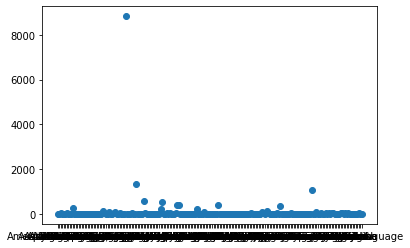

In [40]:
plt.scatter(df_lang.index, df_lang)

               0
Aboriginal  16.0
Acholi       3.0
Afrikaans   22.0
Akan         1.0
Albanian    11.0
...          ...
Xhosa       15.0
Yakut        1.0
Yiddish     46.0
Yoruba       6.0
Zulu        12.0

[202 rows x 1 columns]
                 0
English     8833.0
French      1360.0
Spanish     1061.0
German       592.0
Hindi        528.0
Mandarin     414.0
Japanese     402.0
Italian      397.0
Russian      356.0
Arabic       282.0
Korean       213.0
Hebrew       207.0
Portuguese   150.0
Cantonese    133.0
Latin         98.0
Swedish       83.0
Chinese       76.0
Persian       74.0
Danish        66.0
Dutch         60.0


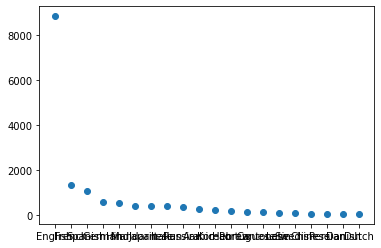

In [41]:
print(df_lang)
#df_lang['0'].idxmax()
#df_lang = df_lang.rename_axis('index').reset_index()

df_lang[0].argmax()
#df_lang.loc[]
import copy
df_lang_test = copy.deepcopy(df_lang)
x = df_lang_test.nlargest(20,0) #df.nlargest(n,columns) columns에 '컬럼이름' 아니고 바로 컬럼이름 써주면됨
print(x)
plt.scatter(x.index, x)

In [42]:
#English 1로 바꾸기.

# reset index
df.reset_index(drop = True,inplace = True)
df

# adding English column
AmiEnglish = Language_mat.English #추가해주기.
df = pd.concat([df, AmiEnglish], axis = 1)

df = df.drop(['Language'],axis = 1)
df

,Movie_title,Unnamed: 0,Rate,Rating_count,Run_time,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor,Unnamed: 17,Unnamed: 18,Movie_code,imdb_url,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English
0,Hidalgo (2004),287,6.7,76241,136,67303450,"$18,829,435, 7 March 2004","$108,040,622",['Joe Johnston'],['John Fusco'],"['Viggo Mortensen', 'Zuleikha Robinson', 'Omar...",['PG-13'],5 March 2004,Walt Disney Studios,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Ned Kelly (2003),317,6.5,25412,110,86959,"$43,704, 28 March 2004","$6,585,516",['Gregor Jordan'],"['Robert Drewe', 'John Michael McDonagh']","['Heath Ledger ...', 'Orlando Bloom', 'Geoffre...",['R'],26 March 2004,Focus Features,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Milarepa (2006),351,7.0,923,90,151114,"$8,330, 9 September 2007","$252,154",['Neten Chokling'],"['Neten Chokling', 'Tenzing Choyang Gyari']","['Orgyen Tobgyal', 'Orgyen Tobgyal ... Yongten...",['PG'],7 September 2007,Luminous Velocity Releasing,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Der Rote Baron (2008),304,6.4,11545,106,37189,"$13,931, 21 March 2010","$2,783,332",['Nikolai M'],['Nikolai Müllerschön'],['Tomás Koutník ... Young Manfred von Richthof...,['PG-13'],19 March 2010,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Zhi qu wei hu shan (2014),31,6.4,2688,141,228984,"$50,621, 4 January 2015","$141,654,055",['Hark Tsui'],"['Bo Qu', 'Jianxin Huang', 'Hark Tsui', 'Yang ...","['Hanyu Zhang', 'Tony Ka Fai Leung ...', 'Kenn...",['Not Rated'],2 January 2015,Well Go USA Entertainment,NaN,NaN,tt3950078,https://www.imdb.com/title/tt3950078/?ref_=fn_...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10748,Tmavomodrý svet (2001),229,7.2,5450,112,258771,"$19,541, 30 December 2001","$2,381,183",['Jan Sver'],"['Zdenek Sverák', 'Zdenek Sverák']","['Ondrej Vetchý ... Frantisek Sláma', 'Krystof...","['R', 'TV-MA']",11 January 2002,Sony Pictures Classics,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
10749,Brothers in Arms (2003),61,6.0,58,68,3664,"$658, 29 August 2004","$3,664",['Paul Alexander'],['Paul Alexander'],['John Kerry'],['Unrated'],27 August 2004,First Run,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
10750,Sympathie pour le diable (2019),475,7.8,372,100,51150,"$12,144, 1 December 2019","$114,301",['Guillaume de Fontenay'],"['Guillaume Vigneault', 'Guillaume de Fontenay...","['Niels Schneider', 'Vincent Rottiers', 'Ella ...",[],29 November 2019,eOne Entertainment,NaN,NaN,tt7710486,https://www.imdb.com/title/tt7710486/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
10751,All Hat (2007),90,5.2,495,89,15198,NaN,"$15,198",['Leonard Farlinger'],"['Brad Smith', 'Brad Smith']","['Luke Kirby ...', 'Keith Carradine', 'Noam Je...",['R'],18 January 2008,Alliance Atlantis Vivafilm,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


### Certificate

In [43]:
#Certificate 원핫 인코딩 ㅇㅇ

df["Certificate"] = df["Certificate"].str.replace("[","")
df["Certificate"] = df["Certificate"].str.replace("]","")
df["Certificate"] = df["Certificate"].str.strip()
df["Certificate"] = df["Certificate"].str.replace(" ","")
df["Certificate"] = df["Certificate"].str.replace("'","")
df["Certificate"]

0           PG-13
1               R
2              PG
3           PG-13
4        NotRated
           ...   
10748     R,TV-MA
10749     Unrated
10750            
10751           R
10752           R
Name: Certificate, Length: 10753, dtype: object

In [44]:
df[df['Certificate'] == '']

,Movie_title,Unnamed: 0,Rate,Rating_count,Run_time,Gross_USA,Opening Weekend USA,Cumulative Worldwide Gross,Directors,Writers,Stars,Certificate,Released_date,Domestic_distributor,Unnamed: 17,Unnamed: 18,Movie_code,imdb_url,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English
8,Mela (2000),10,3.8,4029,172,220524,"$138,261, 9 January 2000","$220,524",['Dharmesh Darshan'],"['Robin Bhatt', 'Dharmesh Darshan', 'Dharmesh ...","['Aamir Khan', 'Twinkle Khanna', 'Faisal Khan'...",,16 June 2000,Eros International,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,The Weathered Underground (2010),232,6.4,45,310,140091,"$1,010, 31 January 2010","$140,091",['David N. Donihue'],['David N. Donihue'],"['Michael Ciriaco', 'Brea Grant', 'Hollis McLa...",,22 January 2010,Indican Pictures,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
73,Fei chang xing yun (2013),81,5.1,459,114,64432,"$47,006, 22 September 2013","$22,259,179",['Dennie Gordon'],"['Amy Snow', 'Chris Chow', 'Hai Huang', 'Yao M...","['Ziyi Zhang', 'Leehom Wang', 'Terri Kwan', 'R...",,20 September 2013,China Lion Film Distribution,NaN,NaN,tt2102502,https://www.imdb.com/title/tt2102502/?ref_=fn_...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,Vê Si Sài Gòn (2016),161,2.7,267,112,11314,"$2,252, 5 February 2017","$11,314",['Ken Ochiai'],"['Ken Ochiai', 'Michael Thai', 'Michael Thai']","['Thai Hoa', 'Kim Ly', 'Chi Pu', 'Thai Hoa ......",,3 February 2017,CJ Entertainment,NaN,NaN,tt5514372,https://www.imdb.com/title/tt5514372/?ref_=fn_...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
105,Jiao zhu zhuan (2017),92,5.5,726,108,13588,"$5,122, 27 August 2017","$17,274,695",['Lei Yang'],"['Tan Cheung', 'Xu Zhaoqing']","['Talu Wang', ""Tian'ai Zhang"", 'Simon Yam', 'G...",,25 August 2017,Well Go USA Entertainment,NaN,NaN,tt6288650,https://www.imdb.com/title/tt6288650/?ref_=fn_...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10722,Perro come perro (2008),203,6.7,1592,106,80,"$80, 25 January 2009",$80,['Carlos Moreno'],"['Alonso Torres', 'Carlos Moreno']","['Marlon Moreno', 'Marlon Moreno ... Victor Pe...",,23 January 2009,IFC Films,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10732,Evil Intent (2010),410,6.6,34,74,10454,"$205, 30 June 2013","$10,454",['Glenn Berggoetz'],['Glenn Berggoetz'],"['Giovanna Leah', 'Libby Baker', 'Andrea Rabol...",,28 June 2013,Driving With Our Eyes Shut,NaN,NaN,tt1655603,https://www.imdb.com/title/tt1655603/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
10736,In the House of Flies (2012),44,4.5,140,89,9480,"$3,500, 11 May 2014","$9,480",['Gabriel Carrer'],['Angus McLellan'],"['Lindsay Smith', 'Ryan Christopher Kotack ......",,30 May 2014,Parade Deck Films,NaN,NaN,tt2113685,https://www.imdb.com/title/tt2113685/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
10744,10x10 (2018),152,5.0,6913,88,2263,"$1,430, 15 April 2018","$68,260",['Suzi Ewing'],"['Noel Clarke', 'Suzi Ewing']","['Kelly Reilly', 'Luke Evans', 'Olivia Chenery...",,13 April 2018,Vertical Entertainment,NaN,NaN,tt6210996,https://www.imdb.com/title/tt6210996/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [45]:
#질문
#2. 원핫 인코딩

Certificate_iter = (set(x.split(",")) for x in df.Certificate)
print("Certificate_iter:", Certificate_iter)
#1. 겉 괄호는 무엇인지? generator 찾아보기. 
#2. Certificate_iter이 

#1)고윳값
Certificate_set = sorted(set.union(*Certificate_iter)) #sorted는 정렬 함수. *는 언패킹 기능.(괄호 벗기기)
print("Certificate_set:", Certificate_set)
Unique_Certificate = []
for unique_cert in Certificate_set:
  Unique_Certificate.append(unique_cert.strip()) #띄어쓰기 없애서 다시 고유리스트로 만들기
Unique_Certificate = set(Unique_Certificate) 
Unique_Certificate
# 집합1.union(집합2) 이렇게 하면 집합1,집합2의 합집합임!

Certificate_iter: <generator object <genexpr> at 0x7f94499cc938>
Certificate_set: ['', '12', 'Approved', 'G', 'M', 'NC-17', 'NotRated', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'Unrated']


{'',
 '12',
 'Approved',
 'G',
 'M',
 'NC-17',
 'NotRated',
 'PG',
 'PG-13',
 'R',
 'TV-14',
 'TV-G',
 'TV-MA',
 'TV-PG',
 'TV-Y',
 'TV-Y7',
 'TV-Y7-FV',
 'Unrated'}

In [46]:
#2) 0행렬 만들어주기
Certificate_mat = pd.DataFrame(np.zeros((len(df), len(Unique_Certificate))), columns=Unique_Certificate)
Certificate_mat

,,12,TV-MA,R,NC-17,TV-Y7,Unrated,PG-13,PG,TV-PG,TV-14,G,TV-G,TV-Y,TV-Y7-FV,NotRated,Approved,M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
for i, certificate in enumerate(df.Certificate):
  
  Certificate_split = certificate.split(',')
  cert_stripped = []

  for cert_stripped_element in Certificate_split:
    cert_stripped.append(cert_stripped_element.strip())
    Certificate_mat.loc[i, cert_stripped_element.strip()] = 1

Certificate_mat #정상 작동.



 

,,12,TV-MA,R,NC-17,TV-Y7,Unrated,PG-13,PG,TV-PG,TV-14,G,TV-G,TV-Y,TV-Y7-FV,NotRated,Approved,M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10748,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10749,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10750,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10751,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
#Unrated, '',NotRated 합치기
Certificate_mat["Unrated"] = Certificate_mat[""] + Certificate_mat["Unrated"] + Certificate_mat["NotRated"]

# Certificate_mat[~((Certificate_mat["Unrated"] == 0.0) | (Certificate_mat["Unrated"] == 1.0))] #unrated가 잘못 더해진거 있는지 확인

# 1.0이 아닌 값(2.0) --> 1.0으로 바꿔주기 
Certificate_mat["Unrated"] = Certificate_mat["Unrated"].apply(lambda x: 1.0 if x == 2.0 else x) #else x는 여기서 있는 값을 그대로 두는 것.

# NotRated,'' 칼럼은 없애주기
Certificate_mat = Certificate_mat.drop(['','NotRated'],axis = 1)
Certificate_mat


,12,TV-MA,R,NC-17,TV-Y7,Unrated,PG-13,PG,TV-PG,TV-14,G,TV-G,TV-Y,TV-Y7-FV,Approved,M
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10748,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10749,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10750,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10751,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
print(df.shape,Certificate_mat.shape)
#pd.concat([df, Certificate_mat],axis = 1, ignore_index=True)
#index label
#key로 결합


#index 초기화
df.reset_index(drop = True,inplace = True) #df.reset_index(drop = 기존index col 지움?, inplace = 기존df대체)
df = pd.concat([df,Certificate_mat],axis =1)
print(f"df shape:{df.shape}")

df = df.drop(["Certificate"],axis = 1)

(10753, 43) (10753, 16)
df shape:(10753, 59)


### Distributor

Pandas Series에는 문자열 처리기능 대단!
df.column1은 Series임. 

df['column1'].str.contains()는 특정 문자열있는지 확인.


In [50]:
Big6_dist_list = ["Walt Disney","Warner Bros.","Sony Pictures","Universal","20th Century Fox","Paramount Pictures"] 
def am_i_big6(distributor):
  Big6_dist_list = ["Walt Disney","Warner Bros.","Sony Pictures","Universal","20th Century Fox","Paramount Pictures"] 
  if pd.isnull(distributor):
    return 0
    #np.nan

  if distributor in Big6_dist_list:
    return 1
  else:
    return 0
df['Big6_distributor'] = df['Domestic_distributor'].apply(am_i_big6)
counting1 = df['Big6_distributor'].sum(axis = 0)
print(counting1) #215개가 big6라함.-->642

#기존 Domestic_distributor 컬럼 지우기
df = df.drop('Domestic_distributor',axis = 1) # pandas 에서 axis = 1 은 컬럼을 얘기하는데,, 컬럼 별이 아니고 걍 컬럼임. --> df.drop('컬럼명',axis = 1)해야 열이 지워짐. axis = 0은 행 지움.


642



질문
2. 원핫 인코딩

Distributor_iter = (set(x.split(",")) for x in df.Domestic_distributor)
print("Distributor_iter:", Distributor_iter)
1. 겉 괄호는 무엇인지? generator 찾아보기. 
2. Genre_iter이 

1)장르 고윳값 ex Action, Horror 등만 추출
Distributor_set = sorted(set.union(*Distributor_iter)) #sorted는 정렬 함수. *는 언패킹 기능.(괄호 벗기기)
print("Genre_set:", Distributor_set)
 집합1.union(집합2) 이렇게 하면 집합1,집합2의 합집합임!

2) 0행렬 만들어주기
Genre_mat = pd.DataFrame(np.zeros((len(df), len(Genre_set))), columns=Genre_set)
Genre_mat

해당하는 Genre에 1 채워주기. 논리? 이해 완료.
for i, genre in enumerate(df.Genre):
  Genre_mat.loc[i, genre.split(',')] = 1
  #print(Genre_mat.loc[i, genre.split(',')]) #if 안쓰고도 df.loc[i행,[컬럼1,컬럼2]]하면 df에서 해당하는 컬럼1,2에 접근 가능.
  #print(genre.split(',')) #['Documentary', ' Biography', ' Crime'] 이런식으로 나옴.
Genre_mat

### Opening weekend_USA

In [51]:
#0. nan 검출
len(df['Opening Weekend USA'])
NA_Opening_weekend_USA = df[df['Opening Weekend USA'].isnull()]

#null값 제거한 df
df = df[~df['Opening Weekend USA'].isnull()]
df.reset_index(drop = True, inplace = True)
#df['Opening Weekend USA'][0] 이렇게 인덱싱하면 '0' 으로 쓰여있는 인덱스가서 찾음. df자료 빼내고는 df.reset_index 필수


In [52]:
# #ㅇ여역여기 .group() 1,3ㅇ으을으로 ㅂ바밖바꾸꿈꾸며면 ㄷ도되된되느는늕는제 ㅊ

# def split_ow_sales(opening_weekend_sales):

#   if pd.isnull(opening_weekend_sales):
#     return np.nan

#   else:
#     m = re.search('(\$.*, )(.*)', df['Opening Weekend USA'])
#     return m.group(1)  

# def split_ow_date(opening_weekend_date):
#   if pd.isnull(opening_weekend_date):
#     return np.nan
  
#   else:
#     m = re.search('(\$.*, )(.*)', df['Opening Weekend USA'])
#     return m.group(2)

# df['Opening Weekend sales'] = df['Opening Weekend USA'].apply(split_ow_sales)
# df['Opening Weekend date'] = df['Opening Weekend USA'].apply(split_ow_date)

In [53]:
#1.매출, 일자 분리 using RE

opening_weekend_sales = ''
opening_weekend_date = ''
df['Opening Weekend sales'] = opening_weekend_sales
df['Opening Weekend date'] = opening_weekend_date 

for i in range(len(df['Opening Weekend USA'])):
  try:
    m = re.search('(\$.*)(, )(.*)', df['Opening Weekend USA'][i])
    #print(m.group(1))
    #print(m.group(3))
    df['Opening Weekend sales'][i] =str(m.group(1))  
    df['Opening Weekend date'][i] = str(m.group(3))
    
  except TypeError:
    continue

  # if i % 100 == 0:
  #   print(f'{i} laps')

df["Opening Weekend sales"] = df["Opening Weekend sales"].str.replace("$","")
df["Opening Weekend sales"] = df["Opening Weekend sales"].str.replace(",","")

df = df.drop('Opening Weekend USA',axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
#df[df["Opening Weekend sales"].isnull()] # null값 없음.


df["Opening Weekend sales"] = df["Opening Weekend sales"].apply(lambda x: int(x) if not type(x) == int else x)


### Star, Director, Writer

In [55]:
#저장해둔 dictionary 로드하는 코드 연도:누적 배우 리스트(Academy Award, Golden globe)

with open("/gdrive/My Drive/movie_predict/golden globe, academy file/star_winner.pickle","rb") as fr:
  star_winner = pickle.load(fr)
with open("/gdrive/My Drive/movie_predict/golden globe, academy file/star_nominee.pickle","rb") as fr:
  star_nominee = pickle.load(fr)
with open("/gdrive/My Drive/movie_predict/golden globe, academy file/director_winner.pickle","rb") as fr:
  director_winner = pickle.load(fr)
with open("/gdrive/My Drive/movie_predict/golden globe, academy file/director_nominee.pickle","rb") as fr:
  director_nominee = pickle.load(fr)
with open("/gdrive/My Drive/movie_predict/golden globe, academy file/writer_winner.pickle","rb") as fr:
  writer_winner = pickle.load(fr)
with open("/gdrive/My Drive/movie_predict/golden globe, academy file/writer_nominee.pickle","rb") as fr:
  writer_nominee = pickle.load(fr)

In [56]:
# star/director/writer columns 생성

#노미니,위너 빈 컬럼 생성
df["star_winner"] = 0 
df["star_nominee"] = 0 
df["director_winner"] = 0 
df["director_nominee"] = 0 
df["writer_winner"] = 0
df["writer_nominee"] = 0

#Stars
 # 1. ... 없애주고 새로운 리스트 만들기
df['Star'] = 0
for n in range(len(df.index)): #영화접근
  #우선 ' ... ' cleansing 
  star_list = ast.literal_eval(df['Stars'].iloc[n]) #n번째 행(영화) 행자리임 바꾸삼
  row_star = []
  for i in range(len(star_list)): # n번째  영화안의 i번째 배우    
    #정규 표현식으로 각 배우' ... ' 없애기.
    try:
      m = re.search(r'(.*)\.\.\.(.*)',star_list[i]) # ( ... )는 띄어쓰기+ 모든문자(점 포함) 세번+띄어쓰기 매칭하는거.
      star = m.group(1)
      row_star.append(star)
       
    except: #이미 정상이어서 정규표현식이 안 통하는 애들
      star = star_list[i]
      row_star.append(star)
  
  df['Star'].iloc[n] = row_star

df = df.drop(['Stars'], axis=1) #기존의 이상하게 수집된 Stars컬럼 지우기
#year column만들기
df['year'] = pd.to_datetime(df['Released_date']).dt.year

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#### Stars

In [57]:
#1.star_winner 구분
# merge
star_winners = pd.DataFrame({
    'year' : list(star_winner.keys()),
     'winner': list(star_winner.values())})
df = df.merge(star_winners, on="year")


In [58]:
# assign 0/1 
df['star_winner'] = df.apply(
    lambda x: int(len(set(x.Star).intersection(x.winner)) != 0), axis=1)

df = df.drop(['winner'], axis=1)

df

,Movie_title,Unnamed: 0,Rate,Rating_count,Run_time,Gross_USA,Cumulative Worldwide Gross,Directors,Writers,Released_date,Unnamed: 17,Unnamed: 18,Movie_code,imdb_url,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English,12,TV-MA,R,NC-17,TV-Y7,Unrated,PG-13,PG,TV-PG,TV-14,G,TV-G,TV-Y,TV-Y7-FV,Approved,M,Big6_distributor,Opening Weekend sales,Opening Weekend date,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,Star,year
0,Hidalgo (2004),287,6.7,76241,136,67303450,"$108,040,622",['Joe Johnston'],['John Fusco'],5 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18829435,7 March 2004,1,0,0,0,0,0,"[Viggo Mortensen, Zuleikha Robinson, Omar Shar...",2004
1,Ned Kelly (2003),317,6.5,25412,110,86959,"$6,585,516",['Gregor Jordan'],"['Robert Drewe', 'John Michael McDonagh']",26 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,43704,28 March 2004,1,0,0,0,0,0,"[Heath Ledger , Orlando Bloom, Geoffrey Rush, ...",2004
2,Catch That Kid (2004),240,5.2,9489,91,16703799,"$16,951,702",['Bart Freundlich'],"['Nikolaj Arcel', 'Fabian Wullenweber', 'Erlen...",6 February 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5824860,8 February 2004,0,0,0,0,0,0,"[Kristen Stewart, Corbin Bleu, Max Thieriot, J...",2004
3,Agent Cody Banks 2: Destination London (2004),296,4.6,13817,100,23630159,"$28,818,995",['Kevin Allen'],"['Jeffrey Jurgensen', 'Harald Zwart', 'Dylan S...",12 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8014005,14 March 2004,0,0,0,0,0,0,"[Frankie Muniz, Anthony Anderson, Hannah Spear...",2004
4,Around the World in 80 Days (2004),445,5.9,83144,120,24008137,"$72,178,895",['Frank Coraci'],"['Jules Verne', 'David N. Titcher', 'David Ben...",16 June 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7576132,20 June 2004,0,0,0,0,0,0,"[Jackie Chan, Steve Coogan, Jackie Chan , Stev...",2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10200,En Brazos de un Asesino (2019),130,5.9,279,106,425332,"$425,332",['Mat'],"['Jeff Goldberg', 'William Levy']",6 December 2019,NaN,NaN,tt10080270,https://www.imdb.com/title/tt10080270/?ref_=fn...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,226670,8 December 2019,0,0,0,0,0,0,"[William Levy, Ettore D'Alessandro, Dalisa Ale...",2019
10201,Bi bei shang geng bei shang de gu shi (2018),448,6.1,830,105,722669,"$142,958,164",['Gavin Lin'],"['Hermes Lu', 'Gavin Lin']",15 March 2019,NaN,NaN,tt9081562,https://www.imdb.com/title/tt9081562/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,185928,17 March 2019,0,0,0,0,0,0,"[Ivy Yi-Han Chen, Jasper Liu, Bryan Shu-Hao Ch...",2019
10202,Xia yi ren: Qian ren (2019),45,4.0,35,98,91884,"$19,015,465","['Hung-i Chen', 'Chen Hung-i', 'Haozhou Qiu']",['Hung-i C

In [59]:
#2.star_nominee 구분
# merge
star_nominees = pd.DataFrame({
    'year' : list(star_nominee.keys()),
     'nominee': list(star_nominee.values())})
df = df.merge(star_nominees, on="year")


In [60]:
# assign 0/1 
df['star_nominee']  = df.apply(
    lambda x: int(len(set(x.Star).intersection(x.nominee)) != 0), axis=1)

df = df.drop(['nominee'], axis=1)
df

,Movie_title,Unnamed: 0,Rate,Rating_count,Run_time,Gross_USA,Cumulative Worldwide Gross,Directors,Writers,Released_date,Unnamed: 17,Unnamed: 18,Movie_code,imdb_url,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English,12,TV-MA,R,NC-17,TV-Y7,Unrated,PG-13,PG,TV-PG,TV-14,G,TV-G,TV-Y,TV-Y7-FV,Approved,M,Big6_distributor,Opening Weekend sales,Opening Weekend date,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,Star,year
0,Hidalgo (2004),287,6.7,76241,136,67303450,"$108,040,622",['Joe Johnston'],['John Fusco'],5 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18829435,7 March 2004,1,1,0,0,0,0,"[Viggo Mortensen, Zuleikha Robinson, Omar Shar...",2004
1,Ned Kelly (2003),317,6.5,25412,110,86959,"$6,585,516",['Gregor Jordan'],"['Robert Drewe', 'John Michael McDonagh']",26 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,43704,28 March 2004,1,1,0,0,0,0,"[Heath Ledger , Orlando Bloom, Geoffrey Rush, ...",2004
2,Catch That Kid (2004),240,5.2,9489,91,16703799,"$16,951,702",['Bart Freundlich'],"['Nikolaj Arcel', 'Fabian Wullenweber', 'Erlen...",6 February 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5824860,8 February 2004,0,1,0,0,0,0,"[Kristen Stewart, Corbin Bleu, Max Thieriot, J...",2004
3,Agent Cody Banks 2: Destination London (2004),296,4.6,13817,100,23630159,"$28,818,995",['Kevin Allen'],"['Jeffrey Jurgensen', 'Harald Zwart', 'Dylan S...",12 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8014005,14 March 2004,0,1,0,0,0,0,"[Frankie Muniz, Anthony Anderson, Hannah Spear...",2004
4,Around the World in 80 Days (2004),445,5.9,83144,120,24008137,"$72,178,895",['Frank Coraci'],"['Jules Verne', 'David N. Titcher', 'David Ben...",16 June 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7576132,20 June 2004,0,0,0,0,0,0,"[Jackie Chan, Steve Coogan, Jackie Chan , Stev...",2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10200,En Brazos de un Asesino (2019),130,5.9,279,106,425332,"$425,332",['Mat'],"['Jeff Goldberg', 'William Levy']",6 December 2019,NaN,NaN,tt10080270,https://www.imdb.com/title/tt10080270/?ref_=fn...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,226670,8 December 2019,0,0,0,0,0,0,"[William Levy, Ettore D'Alessandro, Dalisa Ale...",2019
10201,Bi bei shang geng bei shang de gu shi (2018),448,6.1,830,105,722669,"$142,958,164",['Gavin Lin'],"['Hermes Lu', 'Gavin Lin']",15 March 2019,NaN,NaN,tt9081562,https://www.imdb.com/title/tt9081562/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,185928,17 March 2019,0,0,0,0,0,0,"[Ivy Yi-Han Chen, Jasper Liu, Bryan Shu-Hao Ch...",2019
10202,Xia yi ren: Qian ren (2019),45,4.0,35,98,91884,"$19,015,465","['Hung-i Chen', 'Chen Hung-i', 'Haozhou Qiu']",['Hung-i C

#### Directors

In [61]:
#[Directors]

 # 1. 새로운 리스트 만들기
df['Director'] = 0
for n in range(len(df.index)): #영화접근 
  director_list = ast.literal_eval(df['Directors'].iloc[n]) #n번째 행(영화) 행자리임 바꾸삼
  df['Director'].iloc[n] = director_list

df = df.drop(['Directors'], axis=1) #기존의 이상하게 수집된 Stars컬럼 지우기

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [62]:
#3.director_winner 구분
# merge
director_winners = pd.DataFrame({
    'year' : list(director_winner.keys()),
     'winner': list(director_winner.values())})
df = df.merge(director_winners, on="year")
df

,Movie_title,Unnamed: 0,Rate,Rating_count,Run_time,Gross_USA,Cumulative Worldwide Gross,Writers,Released_date,Unnamed: 17,Unnamed: 18,Movie_code,imdb_url,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English,12,TV-MA,R,NC-17,TV-Y7,Unrated,PG-13,PG,TV-PG,TV-14,G,TV-G,TV-Y,TV-Y7-FV,Approved,M,Big6_distributor,Opening Weekend sales,Opening Weekend date,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,Star,year,Director,winner
0,Hidalgo (2004),287,6.7,76241,136,67303450,"$108,040,622",['John Fusco'],5 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18829435,7 March 2004,1,1,0,0,0,0,"[Viggo Mortensen, Zuleikha Robinson, Omar Shar...",2004,[Joe Johnston],"[Peter Jackson, Roman Polanski, Ron Howard, St..."
1,Ned Kelly (2003),317,6.5,25412,110,86959,"$6,585,516","['Robert Drewe', 'John Michael McDonagh']",26 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,43704,28 March 2004,1,1,0,0,0,0,"[Heath Ledger , Orlando Bloom, Geoffrey Rush, ...",2004,[Gregor Jordan],"[Peter Jackson, Roman Polanski, Ron Howard, St..."
2,Catch That Kid (2004),240,5.2,9489,91,16703799,"$16,951,702","['Nikolaj Arcel', 'Fabian Wullenweber', 'Erlen...",6 February 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5824860,8 February 2004,0,1,0,0,0,0,"[Kristen Stewart, Corbin Bleu, Max Thieriot, J...",2004,[Bart Freundlich],"[Peter Jackson, Roman Polanski, Ron Howard, St..."
3,Agent Cody Banks 2: Destination London (2004),296,4.6,13817,100,23630159,"$28,818,995","['Jeffrey Jurgensen', 'Harald Zwart', 'Dylan S...",12 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8014005,14 March 2004,0,1,0,0,0,0,"[Frankie Muniz, Anthony Anderson, Hannah Spear...",2004,[Kevin Allen],"[Peter Jackson, Roman Polanski, Ron Howard, St..."
4,Around the World in 80 Days (2004),445,5.9,83144,120,24008137,"$72,178,895","['Jules Verne', 'David N. Titcher', 'David Ben...",16 June 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7576132,20 June 2004,0,0,0,0,0,0,"[Jackie Chan, Steve Coogan, Jackie Chan , Stev...",2004,[Frank Coraci],"[Peter Jackson, Roman Polanski, Ron Howard, St..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10200,En Brazos de un Asesino (2019),130,5.9,279,106,425332,"$425,332","['Jeff Goldberg', 'William Levy']",6 December 2019,NaN,NaN,tt10080270,https://www.imdb.com/title/tt10080270/?ref_=fn...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,226670,8 December 2019,0,0,0,0,0,0,"[William Levy, Ettore D'Alessandro, Dalisa Ale...",2019,[Mat],"[Alfonso Cuarón, Guillermo del Toro, Damien Ch..."
10201,Bi bei shang geng bei shang de gu shi (2018),448,6.1,830,105,722669,"$142,958,164","['Hermes Lu', 'Gavin Lin']",15 March 2019,NaN,NaN,tt9081562,https://www.imdb.com/title/tt9081562/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0

In [63]:
# assign 0/1 
df['director_winner'] = df.apply(
    lambda x: int(len(set(x.Director).intersection(x.winner)) != 0), axis=1)

df = df.drop(['winner'], axis=1)

df

,Movie_title,Unnamed: 0,Rate,Rating_count,Run_time,Gross_USA,Cumulative Worldwide Gross,Writers,Released_date,Unnamed: 17,Unnamed: 18,Movie_code,imdb_url,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English,12,TV-MA,R,NC-17,TV-Y7,Unrated,PG-13,PG,TV-PG,TV-14,G,TV-G,TV-Y,TV-Y7-FV,Approved,M,Big6_distributor,Opening Weekend sales,Opening Weekend date,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,Star,year,Director
0,Hidalgo (2004),287,6.7,76241,136,67303450,"$108,040,622",['John Fusco'],5 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18829435,7 March 2004,1,1,0,0,0,0,"[Viggo Mortensen, Zuleikha Robinson, Omar Shar...",2004,[Joe Johnston]
1,Ned Kelly (2003),317,6.5,25412,110,86959,"$6,585,516","['Robert Drewe', 'John Michael McDonagh']",26 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,43704,28 March 2004,1,1,0,0,0,0,"[Heath Ledger , Orlando Bloom, Geoffrey Rush, ...",2004,[Gregor Jordan]
2,Catch That Kid (2004),240,5.2,9489,91,16703799,"$16,951,702","['Nikolaj Arcel', 'Fabian Wullenweber', 'Erlen...",6 February 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5824860,8 February 2004,0,1,0,0,0,0,"[Kristen Stewart, Corbin Bleu, Max Thieriot, J...",2004,[Bart Freundlich]
3,Agent Cody Banks 2: Destination London (2004),296,4.6,13817,100,23630159,"$28,818,995","['Jeffrey Jurgensen', 'Harald Zwart', 'Dylan S...",12 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8014005,14 March 2004,0,1,0,0,0,0,"[Frankie Muniz, Anthony Anderson, Hannah Spear...",2004,[Kevin Allen]
4,Around the World in 80 Days (2004),445,5.9,83144,120,24008137,"$72,178,895","['Jules Verne', 'David N. Titcher', 'David Ben...",16 June 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7576132,20 June 2004,0,0,0,0,0,0,"[Jackie Chan, Steve Coogan, Jackie Chan , Stev...",2004,[Frank Coraci]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10200,En Brazos de un Asesino (2019),130,5.9,279,106,425332,"$425,332","['Jeff Goldberg', 'William Levy']",6 December 2019,NaN,NaN,tt10080270,https://www.imdb.com/title/tt10080270/?ref_=fn...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,226670,8 December 2019,0,0,0,0,0,0,"[William Levy, Ettore D'Alessandro, Dalisa Ale...",2019,[Mat]
10201,Bi bei shang geng bei shang de gu shi (2018),448,6.1,830,105,722669,"$142,958,164","['Hermes Lu', 'Gavin Lin']",15 March 2019,NaN,NaN,tt9081562,https://www.imdb.com/title/tt9081562/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,185928,17 March 2019,0,0,0,0,0,0,"[Ivy Yi-Han Chen, Jasper Liu, Bryan Shu-Hao Ch...",2019,[Gavin Lin]
10202,Xia yi ren: Qian ren (2019),45,4.0,35,98,91884,"$19,015,465",['Hung-i Chen'],3 May 2019,NaN,NaN,tt10234494,https://www.imdb.com/title/

In [64]:
#4.director_nominee 구분
# merge
director_nominees = pd.DataFrame({
    'year' : list(director_nominee.keys()),
     'nominee': list(director_nominee.values())})
df = df.merge(director_nominees, on="year")
df

,Movie_title,Unnamed: 0,Rate,Rating_count,Run_time,Gross_USA,Cumulative Worldwide Gross,Writers,Released_date,Unnamed: 17,Unnamed: 18,Movie_code,imdb_url,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English,12,TV-MA,R,NC-17,TV-Y7,Unrated,PG-13,PG,TV-PG,TV-14,G,TV-G,TV-Y,TV-Y7-FV,Approved,M,Big6_distributor,Opening Weekend sales,Opening Weekend date,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,Star,year,Director,nominee
0,Hidalgo (2004),287,6.7,76241,136,67303450,"$108,040,622",['John Fusco'],5 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18829435,7 March 2004,1,1,0,0,0,0,"[Viggo Mortensen, Zuleikha Robinson, Omar Shar...",2004,[Joe Johnston],"[Fernando Meirelles, Sofia Coppola, Peter Weir..."
1,Ned Kelly (2003),317,6.5,25412,110,86959,"$6,585,516","['Robert Drewe', 'John Michael McDonagh']",26 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,43704,28 March 2004,1,1,0,0,0,0,"[Heath Ledger , Orlando Bloom, Geoffrey Rush, ...",2004,[Gregor Jordan],"[Fernando Meirelles, Sofia Coppola, Peter Weir..."
2,Catch That Kid (2004),240,5.2,9489,91,16703799,"$16,951,702","['Nikolaj Arcel', 'Fabian Wullenweber', 'Erlen...",6 February 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5824860,8 February 2004,0,1,0,0,0,0,"[Kristen Stewart, Corbin Bleu, Max Thieriot, J...",2004,[Bart Freundlich],"[Fernando Meirelles, Sofia Coppola, Peter Weir..."
3,Agent Cody Banks 2: Destination London (2004),296,4.6,13817,100,23630159,"$28,818,995","['Jeffrey Jurgensen', 'Harald Zwart', 'Dylan S...",12 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8014005,14 March 2004,0,1,0,0,0,0,"[Frankie Muniz, Anthony Anderson, Hannah Spear...",2004,[Kevin Allen],"[Fernando Meirelles, Sofia Coppola, Peter Weir..."
4,Around the World in 80 Days (2004),445,5.9,83144,120,24008137,"$72,178,895","['Jules Verne', 'David N. Titcher', 'David Ben...",16 June 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7576132,20 June 2004,0,0,0,0,0,0,"[Jackie Chan, Steve Coogan, Jackie Chan , Stev...",2004,[Frank Coraci],"[Fernando Meirelles, Sofia Coppola, Peter Weir..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10200,En Brazos de un Asesino (2019),130,5.9,279,106,425332,"$425,332","['Jeff Goldberg', 'William Levy']",6 December 2019,NaN,NaN,tt10080270,https://www.imdb.com/title/tt10080270/?ref_=fn...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,226670,8 December 2019,0,0,0,0,0,0,"[William Levy, Ettore D'Alessandro, Dalisa Ale...",2019,[Mat],"[Spike Lee, Pawel Pawlikowski, Yorgos Lanthimo..."
10201,Bi bei shang geng bei shang de gu shi (2018),448,6.1,830,105,722669,"$142,958,164","['Hermes Lu', 'Gavin Lin']",15 March 2019,NaN,NaN,tt9081562,https://www.imdb.com/title/tt9081562/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,

In [65]:
# assign 0/1 
df['director_nominee'] = df.apply(
    lambda x: int(len(set(x.Director).intersection(x.nominee)) != 0), axis=1)

df = df.drop(['nominee'], axis=1)

df

,Movie_title,Unnamed: 0,Rate,Rating_count,Run_time,Gross_USA,Cumulative Worldwide Gross,Writers,Released_date,Unnamed: 17,Unnamed: 18,Movie_code,imdb_url,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English,12,TV-MA,R,NC-17,TV-Y7,Unrated,PG-13,PG,TV-PG,TV-14,G,TV-G,TV-Y,TV-Y7-FV,Approved,M,Big6_distributor,Opening Weekend sales,Opening Weekend date,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,Star,year,Director
0,Hidalgo (2004),287,6.7,76241,136,67303450,"$108,040,622",['John Fusco'],5 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18829435,7 March 2004,1,1,0,0,0,0,"[Viggo Mortensen, Zuleikha Robinson, Omar Shar...",2004,[Joe Johnston]
1,Ned Kelly (2003),317,6.5,25412,110,86959,"$6,585,516","['Robert Drewe', 'John Michael McDonagh']",26 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,43704,28 March 2004,1,1,0,0,0,0,"[Heath Ledger , Orlando Bloom, Geoffrey Rush, ...",2004,[Gregor Jordan]
2,Catch That Kid (2004),240,5.2,9489,91,16703799,"$16,951,702","['Nikolaj Arcel', 'Fabian Wullenweber', 'Erlen...",6 February 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5824860,8 February 2004,0,1,0,0,0,0,"[Kristen Stewart, Corbin Bleu, Max Thieriot, J...",2004,[Bart Freundlich]
3,Agent Cody Banks 2: Destination London (2004),296,4.6,13817,100,23630159,"$28,818,995","['Jeffrey Jurgensen', 'Harald Zwart', 'Dylan S...",12 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8014005,14 March 2004,0,1,0,0,0,0,"[Frankie Muniz, Anthony Anderson, Hannah Spear...",2004,[Kevin Allen]
4,Around the World in 80 Days (2004),445,5.9,83144,120,24008137,"$72,178,895","['Jules Verne', 'David N. Titcher', 'David Ben...",16 June 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7576132,20 June 2004,0,0,0,0,0,0,"[Jackie Chan, Steve Coogan, Jackie Chan , Stev...",2004,[Frank Coraci]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10200,En Brazos de un Asesino (2019),130,5.9,279,106,425332,"$425,332","['Jeff Goldberg', 'William Levy']",6 December 2019,NaN,NaN,tt10080270,https://www.imdb.com/title/tt10080270/?ref_=fn...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,226670,8 December 2019,0,0,0,0,0,0,"[William Levy, Ettore D'Alessandro, Dalisa Ale...",2019,[Mat]
10201,Bi bei shang geng bei shang de gu shi (2018),448,6.1,830,105,722669,"$142,958,164","['Hermes Lu', 'Gavin Lin']",15 March 2019,NaN,NaN,tt9081562,https://www.imdb.com/title/tt9081562/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,185928,17 March 2019,0,0,0,0,0,0,"[Ivy Yi-Han Chen, Jasper Liu, Bryan Shu-Hao Ch...",2019,[Gavin Lin]
10202,Xia yi ren: Qian ren (2019),45,4.0,35,98,91884,"$19,015,465",['Hung-i Chen'],3 May 2019,NaN,NaN,tt10234494,https://www.imdb.com/title/

#### Writers

In [66]:
#[Writers]

 # 새로운 리스트 만들기
df['Writer'] = 0
for n in range(len(df.index)): #영화접근 
  writer_list = ast.literal_eval(df['Writers'].iloc[n]) #n번째 행(영화) 행자리임 바꾸삼
  df['Writer'].iloc[n] = writer_list

df = df.drop(['Writers'], axis=1) #기존의 이상하게 수집된 Stars컬럼 지우기
df

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Movie_title,Unnamed: 0,Rate,Rating_count,Run_time,Gross_USA,Cumulative Worldwide Gross,Released_date,Unnamed: 17,Unnamed: 18,Movie_code,imdb_url,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English,12,TV-MA,R,NC-17,TV-Y7,Unrated,PG-13,PG,TV-PG,TV-14,G,TV-G,TV-Y,TV-Y7-FV,Approved,M,Big6_distributor,Opening Weekend sales,Opening Weekend date,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,Star,year,Director,Writer
0,Hidalgo (2004),287,6.7,76241,136,67303450,"$108,040,622",5 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18829435,7 March 2004,1,1,0,0,0,0,"[Viggo Mortensen, Zuleikha Robinson, Omar Shar...",2004,[Joe Johnston],[John Fusco]
1,Ned Kelly (2003),317,6.5,25412,110,86959,"$6,585,516",26 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,43704,28 March 2004,1,1,0,0,0,0,"[Heath Ledger , Orlando Bloom, Geoffrey Rush, ...",2004,[Gregor Jordan],"[Robert Drewe, John Michael McDonagh]"
2,Catch That Kid (2004),240,5.2,9489,91,16703799,"$16,951,702",6 February 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5824860,8 February 2004,0,1,0,0,0,0,"[Kristen Stewart, Corbin Bleu, Max Thieriot, J...",2004,[Bart Freundlich],"[Nikolaj Arcel, Fabian Wullenweber, Erlend Loe..."
3,Agent Cody Banks 2: Destination London (2004),296,4.6,13817,100,23630159,"$28,818,995",12 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8014005,14 March 2004,0,1,0,0,0,0,"[Frankie Muniz, Anthony Anderson, Hannah Spear...",2004,[Kevin Allen],"[Jeffrey Jurgensen, Harald Zwart, Dylan Seller..."
4,Around the World in 80 Days (2004),445,5.9,83144,120,24008137,"$72,178,895",16 June 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7576132,20 June 2004,0,0,0,0,0,0,"[Jackie Chan, Steve Coogan, Jackie Chan , Stev...",2004,[Frank Coraci],"[Jules Verne, David N. Titcher, David Benullo,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10200,En Brazos de un Asesino (2019),130,5.9,279,106,425332,"$425,332",6 December 2019,NaN,NaN,tt10080270,https://www.imdb.com/title/tt10080270/?ref_=fn...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,226670,8 December 2019,0,0,0,0,0,0,"[William Levy, Ettore D'Alessandro, Dalisa Ale...",2019,[Mat],"[Jeff Goldberg, William Levy]"
10201,Bi bei shang geng bei shang de gu shi (2018),448,6.1,830,105,722669,"$142,958,164",15 March 2019,NaN,NaN,tt9081562,https://www.imdb.com/title/tt9081562/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,185928,17 March 2019,0,0,0,0,0,0,"[Ivy Yi-Han Chen, Jasper Liu, Bryan Shu-Hao Ch...",2019,[Gavin Lin],"[Hermes Lu, Gavin Lin]"
10202,Xia yi ren: Qian ren (2019),45,4.0,35,98,91884,"$19,015,465",3 May 2019,NaN,NaN,tt10234494,https://www.imdb.com/title/tt10234494/?ref_=fn...,0.0,0.0,

In [67]:
#5.writer_winner 구분 여기부터 ㄱㄱ
# merge
writer_winners = pd.DataFrame({
    'year' : list(writer_winner.keys()),
     'winner': list(writer_winner.values())})
df = df.merge(writer_winners, on="year")
df

,Movie_title,Unnamed: 0,Rate,Rating_count,Run_time,Gross_USA,Cumulative Worldwide Gross,Released_date,Unnamed: 17,Unnamed: 18,Movie_code,imdb_url,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English,12,TV-MA,R,NC-17,TV-Y7,Unrated,PG-13,PG,TV-PG,TV-14,G,TV-G,TV-Y,TV-Y7-FV,Approved,M,Big6_distributor,Opening Weekend sales,Opening Weekend date,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,Star,year,Director,Writer,winner
0,Hidalgo (2004),287,6.7,76241,136,67303450,"$108,040,622",5 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18829435,7 March 2004,1,1,0,0,0,0,"[Viggo Mortensen, Zuleikha Robinson, Omar Shar...",2004,[Joe Johnston],[John Fusco],"[Screenplay by Fran Walsh, Philippa Boyens & P..."
1,Ned Kelly (2003),317,6.5,25412,110,86959,"$6,585,516",26 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,43704,28 March 2004,1,1,0,0,0,0,"[Heath Ledger , Orlando Bloom, Geoffrey Rush, ...",2004,[Gregor Jordan],"[Robert Drewe, John Michael McDonagh]","[Screenplay by Fran Walsh, Philippa Boyens & P..."
2,Catch That Kid (2004),240,5.2,9489,91,16703799,"$16,951,702",6 February 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5824860,8 February 2004,0,1,0,0,0,0,"[Kristen Stewart, Corbin Bleu, Max Thieriot, J...",2004,[Bart Freundlich],"[Nikolaj Arcel, Fabian Wullenweber, Erlend Loe...","[Screenplay by Fran Walsh, Philippa Boyens & P..."
3,Agent Cody Banks 2: Destination London (2004),296,4.6,13817,100,23630159,"$28,818,995",12 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8014005,14 March 2004,0,1,0,0,0,0,"[Frankie Muniz, Anthony Anderson, Hannah Spear...",2004,[Kevin Allen],"[Jeffrey Jurgensen, Harald Zwart, Dylan Seller...","[Screenplay by Fran Walsh, Philippa Boyens & P..."
4,Around the World in 80 Days (2004),445,5.9,83144,120,24008137,"$72,178,895",16 June 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7576132,20 June 2004,0,0,0,0,0,0,"[Jackie Chan, Steve Coogan, Jackie Chan , Stev...",2004,[Frank Coraci],"[Jules Verne, David N. Titcher, David Benullo,...","[Screenplay by Fran Walsh, Philippa Boyens & P..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10200,En Brazos de un Asesino (2019),130,5.9,279,106,425332,"$425,332",6 December 2019,NaN,NaN,tt10080270,https://www.imdb.com/title/tt10080270/?ref_=fn...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,226670,8 December 2019,0,0,0,0,0,0,"[William Levy, Ettore D'Alessandro, Dalisa Ale...",2019,[Mat],"[Jeff Goldberg, William Levy]",[Written by Charlie Wachtel & David Rabinowitz...
10201,Bi bei shang geng bei shang de gu shi (2018),448,6.1,830,105,722669,"$142,958,164",15 March 2019,NaN,NaN,tt9081562,https://www.imdb.com/title/tt9081562/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0

In [68]:
# assign 0/1 
df['writer_winner'] = df.apply(
    lambda x: int(len(set(x.Writer).intersection(x.winner)) != 0), axis=1)
df = df.drop(['winner'], axis=1)
df 

,Movie_title,Unnamed: 0,Rate,Rating_count,Run_time,Gross_USA,Cumulative Worldwide Gross,Released_date,Unnamed: 17,Unnamed: 18,Movie_code,imdb_url,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English,12,TV-MA,R,NC-17,TV-Y7,Unrated,PG-13,PG,TV-PG,TV-14,G,TV-G,TV-Y,TV-Y7-FV,Approved,M,Big6_distributor,Opening Weekend sales,Opening Weekend date,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,Star,year,Director,Writer
0,Hidalgo (2004),287,6.7,76241,136,67303450,"$108,040,622",5 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18829435,7 March 2004,1,1,0,0,0,0,"[Viggo Mortensen, Zuleikha Robinson, Omar Shar...",2004,[Joe Johnston],[John Fusco]
1,Ned Kelly (2003),317,6.5,25412,110,86959,"$6,585,516",26 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,43704,28 March 2004,1,1,0,0,0,0,"[Heath Ledger , Orlando Bloom, Geoffrey Rush, ...",2004,[Gregor Jordan],"[Robert Drewe, John Michael McDonagh]"
2,Catch That Kid (2004),240,5.2,9489,91,16703799,"$16,951,702",6 February 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5824860,8 February 2004,0,1,0,0,0,0,"[Kristen Stewart, Corbin Bleu, Max Thieriot, J...",2004,[Bart Freundlich],"[Nikolaj Arcel, Fabian Wullenweber, Erlend Loe..."
3,Agent Cody Banks 2: Destination London (2004),296,4.6,13817,100,23630159,"$28,818,995",12 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8014005,14 March 2004,0,1,0,0,0,0,"[Frankie Muniz, Anthony Anderson, Hannah Spear...",2004,[Kevin Allen],"[Jeffrey Jurgensen, Harald Zwart, Dylan Seller..."
4,Around the World in 80 Days (2004),445,5.9,83144,120,24008137,"$72,178,895",16 June 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7576132,20 June 2004,0,0,0,0,0,0,"[Jackie Chan, Steve Coogan, Jackie Chan , Stev...",2004,[Frank Coraci],"[Jules Verne, David N. Titcher, David Benullo,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10200,En Brazos de un Asesino (2019),130,5.9,279,106,425332,"$425,332",6 December 2019,NaN,NaN,tt10080270,https://www.imdb.com/title/tt10080270/?ref_=fn...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,226670,8 December 2019,0,0,0,0,0,0,"[William Levy, Ettore D'Alessandro, Dalisa Ale...",2019,[Mat],"[Jeff Goldberg, William Levy]"
10201,Bi bei shang geng bei shang de gu shi (2018),448,6.1,830,105,722669,"$142,958,164",15 March 2019,NaN,NaN,tt9081562,https://www.imdb.com/title/tt9081562/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,185928,17 March 2019,0,0,0,0,0,0,"[Ivy Yi-Han Chen, Jasper Liu, Bryan Shu-Hao Ch...",2019,[Gavin Lin],"[Hermes Lu, Gavin Lin]"
10202,Xia yi ren: Qian ren (2019),45,4.0,35,98,91884,"$19,015,465",3 May 2019,NaN,NaN,tt10234494,https://www.imdb.com/title/tt10234494/?ref_=fn...,0.0,0.0,

In [69]:
#6.writer_nominee 
# merge
writer_nominees = pd.DataFrame({
    'year' : list(writer_nominee.keys()),
     'nominee': list(writer_nominee.values())})
df = df.merge(writer_nominees, on="year")
df

,Movie_title,Unnamed: 0,Rate,Rating_count,Run_time,Gross_USA,Cumulative Worldwide Gross,Released_date,Unnamed: 17,Unnamed: 18,Movie_code,imdb_url,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English,12,TV-MA,R,NC-17,TV-Y7,Unrated,PG-13,PG,TV-PG,TV-14,G,TV-G,TV-Y,TV-Y7-FV,Approved,M,Big6_distributor,Opening Weekend sales,Opening Weekend date,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,Star,year,Director,Writer,nominee
0,Hidalgo (2004),287,6.7,76241,136,67303450,"$108,040,622",5 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18829435,7 March 2004,1,1,0,0,0,0,"[Viggo Mortensen, Zuleikha Robinson, Omar Shar...",2004,[Joe Johnston],[John Fusco],[Written by Robert Pulcini & Shari Springer Be...
1,Ned Kelly (2003),317,6.5,25412,110,86959,"$6,585,516",26 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,43704,28 March 2004,1,1,0,0,0,0,"[Heath Ledger , Orlando Bloom, Geoffrey Rush, ...",2004,[Gregor Jordan],"[Robert Drewe, John Michael McDonagh]",[Written by Robert Pulcini & Shari Springer Be...
2,Catch That Kid (2004),240,5.2,9489,91,16703799,"$16,951,702",6 February 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5824860,8 February 2004,0,1,0,0,0,0,"[Kristen Stewart, Corbin Bleu, Max Thieriot, J...",2004,[Bart Freundlich],"[Nikolaj Arcel, Fabian Wullenweber, Erlend Loe...",[Written by Robert Pulcini & Shari Springer Be...
3,Agent Cody Banks 2: Destination London (2004),296,4.6,13817,100,23630159,"$28,818,995",12 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8014005,14 March 2004,0,1,0,0,0,0,"[Frankie Muniz, Anthony Anderson, Hannah Spear...",2004,[Kevin Allen],"[Jeffrey Jurgensen, Harald Zwart, Dylan Seller...",[Written by Robert Pulcini & Shari Springer Be...
4,Around the World in 80 Days (2004),445,5.9,83144,120,24008137,"$72,178,895",16 June 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7576132,20 June 2004,0,0,0,0,0,0,"[Jackie Chan, Steve Coogan, Jackie Chan , Stev...",2004,[Frank Coraci],"[Jules Verne, David N. Titcher, David Benullo,...",[Written by Robert Pulcini & Shari Springer Be...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10200,En Brazos de un Asesino (2019),130,5.9,279,106,425332,"$425,332",6 December 2019,NaN,NaN,tt10080270,https://www.imdb.com/title/tt10080270/?ref_=fn...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,226670,8 December 2019,0,0,0,0,0,0,"[William Levy, Ettore D'Alessandro, Dalisa Ale...",2019,[Mat],"[Jeff Goldberg, William Levy]","[Written by Joel Coen & Ethan Coen, Screenplay..."
10201,Bi bei shang geng bei shang de gu shi (2018),448,6.1,830,105,722669,"$142,958,164",15 March 2019,NaN,NaN,tt9081562,https://www.imdb.com/title/tt9081562/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.

In [70]:
# assign 0/1 
df['writer_nominee'] = df.apply(
    lambda x: int(len(set(x.Writer).intersection(x.nominee)) != 0), axis=1)
df = df.drop(['nominee'], axis=1)
df 

,Movie_title,Unnamed: 0,Rate,Rating_count,Run_time,Gross_USA,Cumulative Worldwide Gross,Released_date,Unnamed: 17,Unnamed: 18,Movie_code,imdb_url,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English,12,TV-MA,R,NC-17,TV-Y7,Unrated,PG-13,PG,TV-PG,TV-14,G,TV-G,TV-Y,TV-Y7-FV,Approved,M,Big6_distributor,Opening Weekend sales,Opening Weekend date,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,Star,year,Director,Writer
0,Hidalgo (2004),287,6.7,76241,136,67303450,"$108,040,622",5 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18829435,7 March 2004,1,1,0,0,0,0,"[Viggo Mortensen, Zuleikha Robinson, Omar Shar...",2004,[Joe Johnston],[John Fusco]
1,Ned Kelly (2003),317,6.5,25412,110,86959,"$6,585,516",26 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,43704,28 March 2004,1,1,0,0,0,0,"[Heath Ledger , Orlando Bloom, Geoffrey Rush, ...",2004,[Gregor Jordan],"[Robert Drewe, John Michael McDonagh]"
2,Catch That Kid (2004),240,5.2,9489,91,16703799,"$16,951,702",6 February 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5824860,8 February 2004,0,1,0,0,0,0,"[Kristen Stewart, Corbin Bleu, Max Thieriot, J...",2004,[Bart Freundlich],"[Nikolaj Arcel, Fabian Wullenweber, Erlend Loe..."
3,Agent Cody Banks 2: Destination London (2004),296,4.6,13817,100,23630159,"$28,818,995",12 March 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8014005,14 March 2004,0,1,0,0,0,0,"[Frankie Muniz, Anthony Anderson, Hannah Spear...",2004,[Kevin Allen],"[Jeffrey Jurgensen, Harald Zwart, Dylan Seller..."
4,Around the World in 80 Days (2004),445,5.9,83144,120,24008137,"$72,178,895",16 June 2004,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7576132,20 June 2004,0,0,0,0,0,0,"[Jackie Chan, Steve Coogan, Jackie Chan , Stev...",2004,[Frank Coraci],"[Jules Verne, David N. Titcher, David Benullo,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10200,En Brazos de un Asesino (2019),130,5.9,279,106,425332,"$425,332",6 December 2019,NaN,NaN,tt10080270,https://www.imdb.com/title/tt10080270/?ref_=fn...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,226670,8 December 2019,0,0,0,0,0,0,"[William Levy, Ettore D'Alessandro, Dalisa Ale...",2019,[Mat],"[Jeff Goldberg, William Levy]"
10201,Bi bei shang geng bei shang de gu shi (2018),448,6.1,830,105,722669,"$142,958,164",15 March 2019,NaN,NaN,tt9081562,https://www.imdb.com/title/tt9081562/?ref_=fn_...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,185928,17 March 2019,0,0,0,0,0,0,"[Ivy Yi-Han Chen, Jasper Liu, Bryan Shu-Hao Ch...",2019,[Gavin Lin],"[Hermes Lu, Gavin Lin]"
10202,Xia yi ren: Qian ren (2019),45,4.0,35,98,91884,"$19,015,465",3 May 2019,NaN,NaN,tt10234494,https://www.imdb.com/title/tt10234494/?ref_=fn...,0.0,0.0,

In [71]:
###여기까지가 

In [72]:
# award_winner = {'2010':['Momo','Dahyum'],'2011':['Nayeon','Sana'],'2012':['Moon','Jihyo']}
# df = pd.DataFrame({'member':[['Jeong-yeon','Momo'],['Jay-z','Bieber'],['Kim','Moon']],'year' : ['2010','2011','2012']})
# #desired_result
# award_winner = {'2010':['Momo','Dahyum'],'2011':['Nayeon','Sana'],'2012':['Moon','Jihyo']}
# df = pd.DataFrame({'member':[['Jeong-yeon','Momo'],['Jay-z','Bieber'],['Kim','Moon']],'year' : ['2010','2011','2012'],'winner' :[1,0,1]})
# #stack_overflow에서 df합병 아이디어\ --> perfectly worked!
# #1 dictionary >> dataframe만들기
# winners = pd.DataFrame({
#     'year' : list(award_winner.keys()),
#      'winner': list(award_winner.values())})
# result = df.merge(winners, on="year")
# result['result']  = result.apply(
#     lambda x: len(set(x.member).intersection(x.winner)) != 0, axis=1)
# result = result.drop(['winner'], axis=1)
# print (result)
# #apply axis --> axis = 0 이면 열들에게 적용axis = 1이면 행별로 적용
# #intersection

### Cumulative Worldwide Gross

In [73]:
#Cumulative Worldwide Gross ==> 컬럼에서 제외
df["Cumulative Worldwide Gross"] = df["Cumulative Worldwide Gross"].str.replace("$","")
df["Cumulative Worldwide Gross"] = df["Cumulative Worldwide Gross"].str.replace(",","")


df = df.drop(["Cumulative Worldwide Gross"],axis =1)
#혹 나중에 쓸거면 1.결측치 파악+밑에 모으기 2.df에 결측치 없는 df만들기

## 사라진 레코드,칼럼 모으기, 기억

여기서 결측치들 concat party + 사실은sayonara 

In [74]:
#사라진 레코드 기록용
NA_party = pd.concat([NA_Genre, NA_Rate , NA_Run_time, NA_Gross_USA, NA_Opening_weekend_USA], axis = 0) #Rating_count는 NA_Rate에서 걸러짐. Certificate, Distributor, Openening_weekend_USA도 확인하기.
NA_party.to_csv("/gdrive/My Drive/movie_predict/결측치 모여라/NAs")

#NA_Genre 2 / NA_Rate 12 / NA_Run_time 14 / NA_Gross_USA 500 NA_Opening_weekend_USA 544

## 추가적으로 점검

### 필요없는 칼럼 지우기

In [75]:
df = df.drop(["Unnamed: 0","Unnamed: 17","Unnamed: 18","Movie_code",	"imdb_url","Star","Director","Writer"],axis = 1)
df

,Movie_title,Rate,Rating_count,Run_time,Gross_USA,Released_date,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English,12,TV-MA,R,NC-17,TV-Y7,Unrated,PG-13,PG,TV-PG,TV-14,G,TV-G,TV-Y,TV-Y7-FV,Approved,M,Big6_distributor,Opening Weekend sales,Opening Weekend date,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,year
0,Hidalgo (2004),6.7,76241,136,67303450,5 March 2004,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18829435,7 March 2004,1,1,0,0,0,0,2004
1,Ned Kelly (2003),6.5,25412,110,86959,26 March 2004,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,43704,28 March 2004,1,1,0,0,0,0,2004
2,Catch That Kid (2004),5.2,9489,91,16703799,6 February 2004,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5824860,8 February 2004,0,1,0,0,0,0,2004
3,Agent Cody Banks 2: Destination London (2004),4.6,13817,100,23630159,12 March 2004,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8014005,14 March 2004,0,1,0,0,0,0,2004
4,Around the World in 80 Days (2004),5.9,83144,120,24008137,16 June 2004,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7576132,20 June 2004,0,0,0,0,0,0,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10200,En Brazos de un Asesino (2019),5.9,279,106,425332,6 December 2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,226670,8 December 2019,0,0,0,0,0,0,2019
10201,Bi bei shang geng bei shang de gu shi (2018),6.1,830,105,722669,15 March 2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,185928,17 March 2019,0,0,0,0,0,0,2019
10202,Xia yi ren: Qian ren (2019),4.0,35,98,91884,3 May 2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,46720,5 May 2019,0,0,0,0,0,0,2019
10203,The Wedding Guest (2018),5.7,3489,96,386166,8 March 2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18266,3 March 2019,0,1,0,0,0,0,2019


In [76]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10205 entries, 0 to 10204
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Movie_title            10205 non-null  object 
 1   Rate                   10205 non-null  float64
 2   Rating_count           10205 non-null  int64  
 3   Run_time               10205 non-null  int64  
 4   Gross_USA              10205 non-null  int64  
 5   Released_date          10205 non-null  object 
 6   Action                 10205 non-null  float64
 7   Adult                  10205 non-null  float64
 8   Adventure              10205 non-null  float64
 9   Animation              10205 non-null  float64
 10  Biography              10205 non-null  float64
 11  Comedy                 10205 non-null  float64
 12  Crime                  10205 non-null  float64
 13  Documentary            10205 non-null  float64
 14  Drama                  10205 non-null  float64
 15  Fa

,Movie_title,Rate,Rating_count,Run_time,Gross_USA,Released_date,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,English,12,TV-MA,R,NC-17,TV-Y7,Unrated,PG-13,PG,TV-PG,TV-14,G,TV-G,TV-Y,TV-Y7-FV,Approved,M,Big6_distributor,Opening Weekend sales,Opening Weekend date,star_winner,star_nominee,director_winner,director_nominee,writer_winner,writer_nominee,year
0,Hidalgo (2004),6.7,76241,136,67303450,5 March 2004,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18829435,7 March 2004,1,1,0,0,0,0,2004
1,Ned Kelly (2003),6.5,25412,110,86959,26 March 2004,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,43704,28 March 2004,1,1,0,0,0,0,2004
2,Catch That Kid (2004),5.2,9489,91,16703799,6 February 2004,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,5824860,8 February 2004,0,1,0,0,0,0,2004
3,Agent Cody Banks 2: Destination London (2004),4.6,13817,100,23630159,12 March 2004,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8014005,14 March 2004,0,1,0,0,0,0,2004
4,Around the World in 80 Days (2004),5.9,83144,120,24008137,16 June 2004,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7576132,20 June 2004,0,0,0,0,0,0,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10200,En Brazos de un Asesino (2019),5.9,279,106,425332,6 December 2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,226670,8 December 2019,0,0,0,0,0,0,2019
10201,Bi bei shang geng bei shang de gu shi (2018),6.1,830,105,722669,15 March 2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,185928,17 March 2019,0,0,0,0,0,0,2019
10202,Xia yi ren: Qian ren (2019),4.0,35,98,91884,3 May 2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,46720,5 May 2019,0,0,0,0,0,0,2019
10203,The Wedding Guest (2018),5.7,3489,96,386166,8 March 2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18266,3 March 2019,0,1,0,0,0,0,2019


# 영화 관객 수 웹크롤링

In [77]:
"""
#tickets sold 수집완료! csv로 담아 보관, 가져오기 

#웹사이트 the numbers에서 웹크롤링 https://www.the-numbers.com/market/2019/top-grossing-movies
#ㄴㄴ Selenium쓰셈 코랩 다른 파일에 있음.
# 이 코드는 tickets sold 가져오는 법만 남긴거.

#1. 영화제목
df_tickets = pd.DataFrame()
years = [y for y in range(2000,2020)]

for year in years:
  #Real movie, tickets 가져오기
  print("year:", year)
  url = "https://www.the-numbers.com/market/" + str(year) + "/top-grossing-movies" #
  print("url:", url)
  raw = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
  raw.encoding = 'utf-8'
  html = BeautifulSoup(raw.text, "html.parser")
  movie_list = html.select("#page_filling_chart table tr > td > b > a")  # "#page_filling_chart > table > tbody > tr > td > b"

  #movie_titles_ = [] #당해 영화목록
  tickets_plz = [] #당해 티켓(관객 목록)
  for i,movie in enumerate(movie_list):
    tickets = html.select_one("tr:nth-of-type("+str(i+2)+")" + " td:nth-of-type(7)")

    #movie_titles_.append(movie.text + " ("+str(year) + ")") #**year는 이렇게하고 df합쳐서 ticket sold의 값 합치기.
    tickets_plz.append(tickets.text)#

  #DataFrame으로 만들기
  #df_ticket = pd.DataFrame({'Movie_title':movie_titles_,'tickets sold':tickets_plz})
  df_ticket = pd.DataFrame(tickets_plz)
  df_tickets = pd.concat([df_tickets, df_ticket]) 
  
  
df_tickets.to_csv("/gdrive/My Drive/movie_predict/tickets_plz.csv")
"""
df_tickets = pd.read_csv("/gdrive/My Drive/movie_predict/tickets_plz.csv")
df_tickets

,Unnamed: 0,0
0,0,"47,006,948"
1,1,"39,964,728"
2,2,"34,621,530"
3,3,"33,880,971"
4,4,"29,930,517"
...,...,...
14107,674,79
14108,675,60
14109,676,52
14110,677,47


In [ ]:
# 나중에  점검.
#1. 학습 시 released year은 제외한다. v
#2. 원핫인코딩한 Certificate, Genre 점검 v
#3. Domestic_distributor 컬럼 지우기 v
#4.#unnamed 없애기 v
#5. 필요없는 column없애기


# csv파일로 저장

In [78]:
df.to_csv("/gdrive/My Drive/movie_predict/preprocessed_df/preprocessed_df.csv")